# Problem 3

In [22]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import copy
from tabulate import tabulate
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## 3.1: Hierarchical Clustering: Linkages and Features

### Perform hierarchical clustering on the dataset 

In [23]:
data = pd.read_csv('q3-resources/new_customers.csv')
data

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [24]:
# dropping some irrelevant columns
data = data.drop(columns=['CustomerID'], axis=1)

# converting categorical columns
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0        1   19                  15                      39
1        1   21                  15                      81
2        0   20                  16                       6
3        0   23                  16                      77
4        0   31                  17                      40
..     ...  ...                 ...                     ...
195      0   35                 120                      79
196      0   45                 126                      28
197      1   32                 126                      74
198      1   32                 137                      18
199      1   30                 137                      83

[200 rows x 4 columns]

In [25]:
# normalizing data
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [26]:
class HierCluster:
    
    '''
        Function to form Linkage Matrix
    '''
    def make_linkage(self, data, linkage_method):
        self.linkage_method = linkage_method
        return linkage(data, linkage_method)
    
    
    '''
        Function to draw dendrogram given linkage matrix
    '''
    def draw_dendrogram(self, linkage_matrix):
        dendrogram(linkage_matrix)
        plt.title('Dendrogram for {} method'.format(self.linkage_method))
        plt.show()
    
    def __init__(self):
        pass

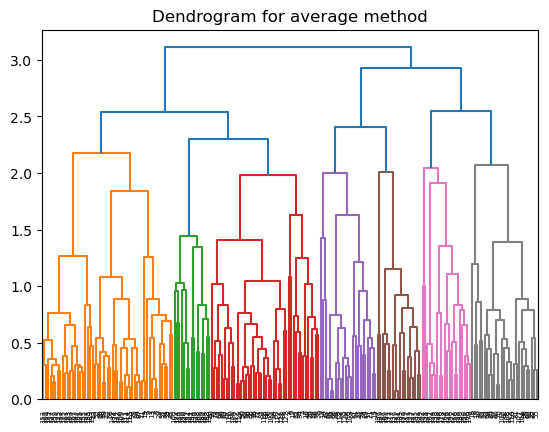

In [27]:
valid_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward', 'median'] # reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

hc = HierCluster()
linkage_matrix = hc.make_linkage(data, 'average')
dend = hc.draw_dendrogram(linkage_matrix)

_Vary the linkages and features used and state your observations._

In [28]:
features_used = list(range(0, data.shape[1]))

In [29]:
from itertools import chain, combinations

def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

feature_subsets = []
for i in powerset(features_used):
    if (len(i) > 0):
        feature_subsets.append(i)

feature_subsets

[(0,),
 (1,),
 (2,),
 (3,),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (2, 3),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 3),
 (1, 2, 3),
 (0, 1, 2, 3)]



	Plotting for features: (0,)


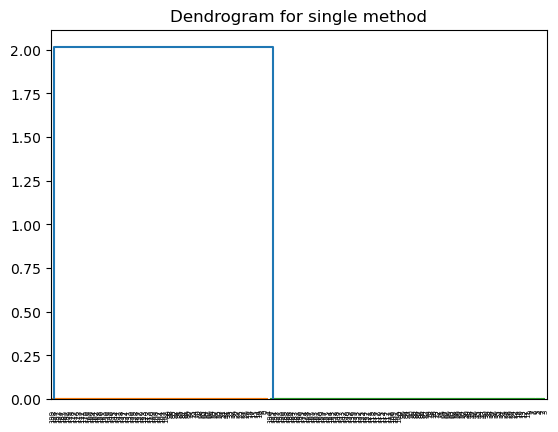

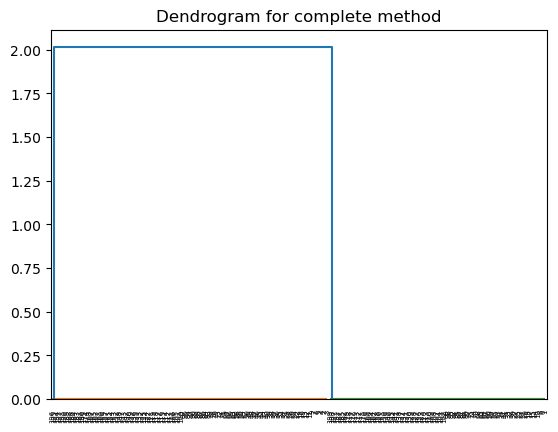

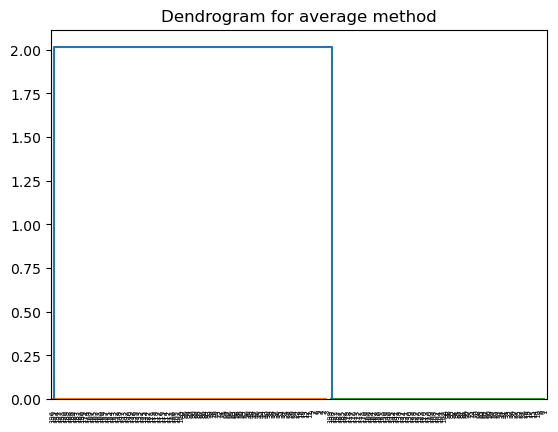

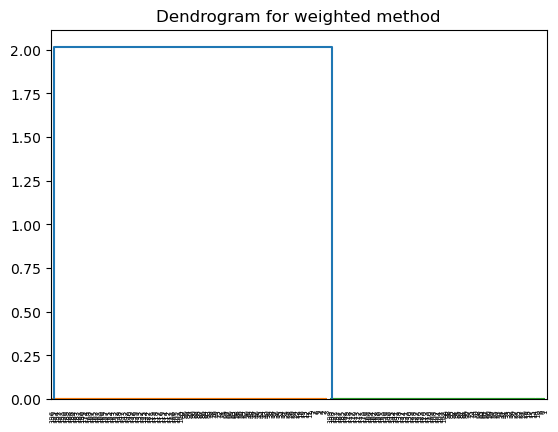

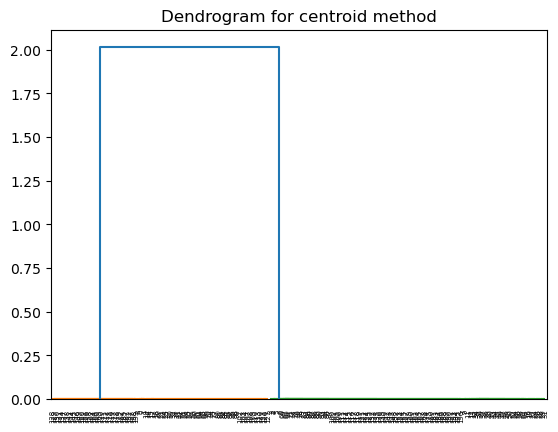

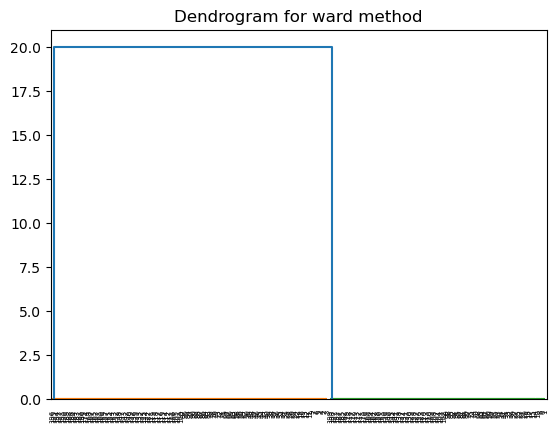

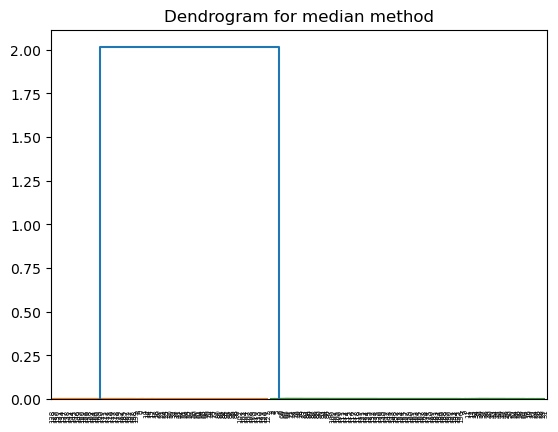



	Plotting for features: (1,)


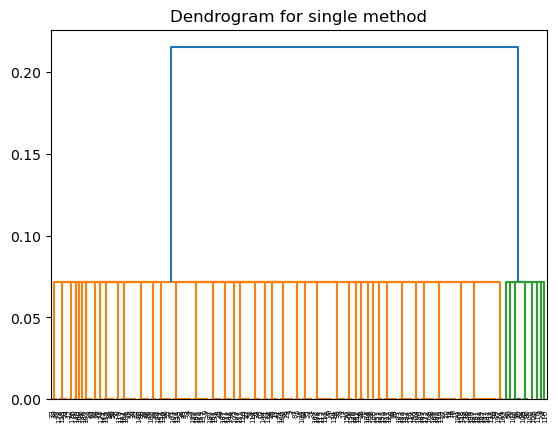

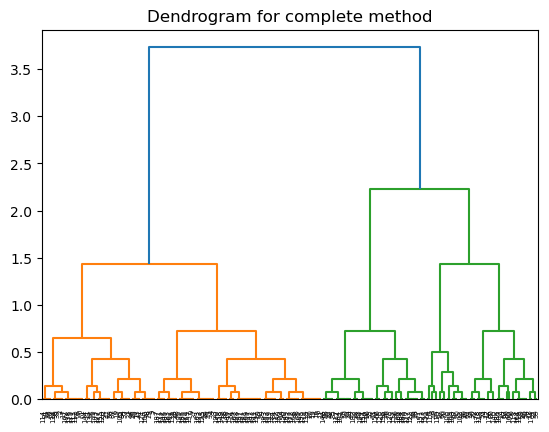

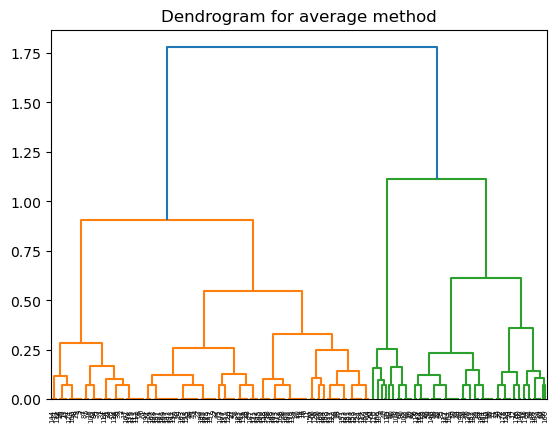

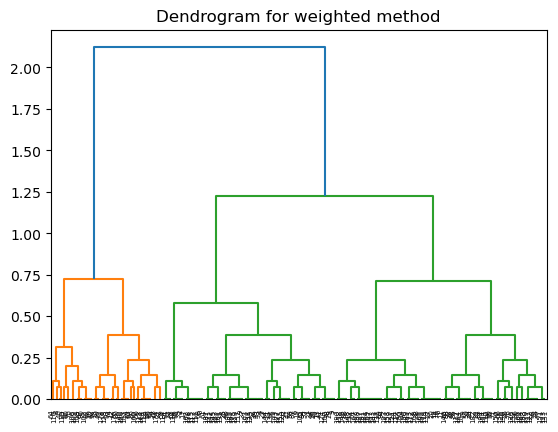

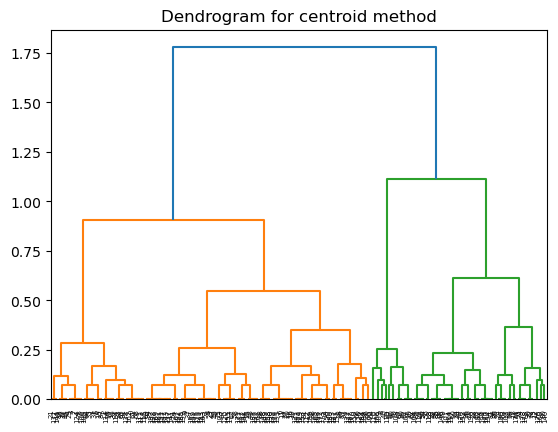

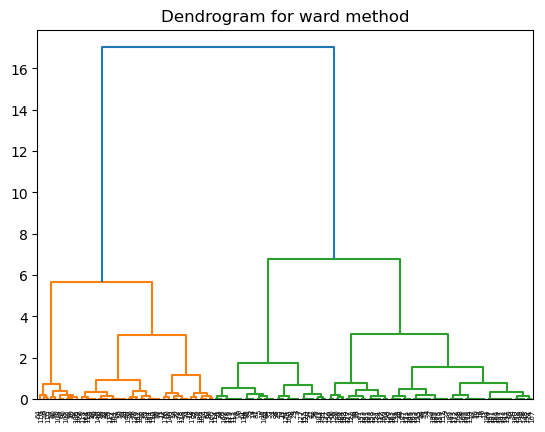

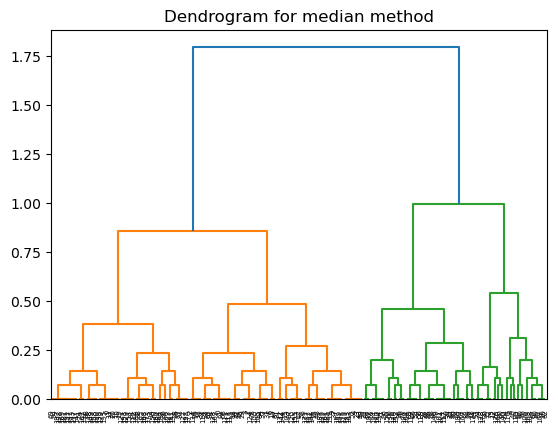



	Plotting for features: (2,)


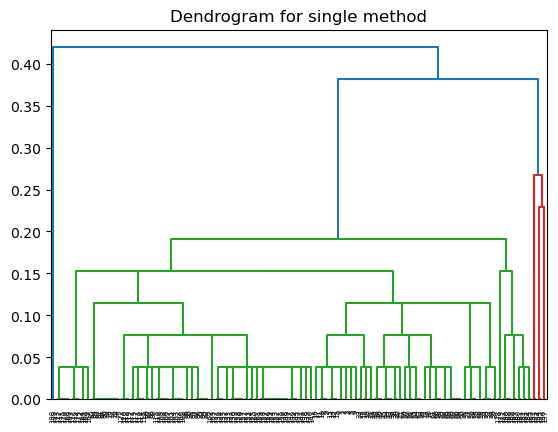

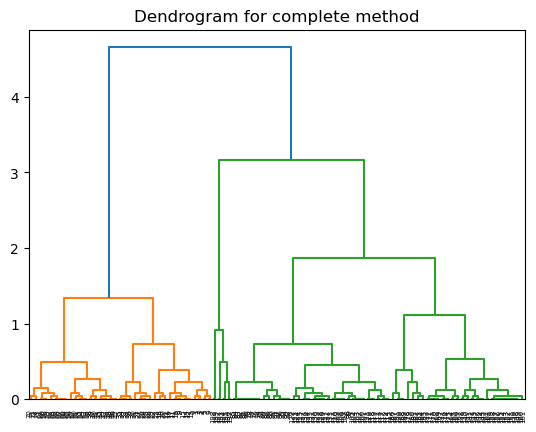

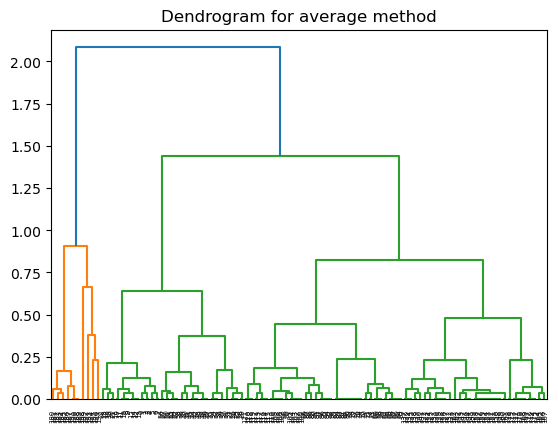

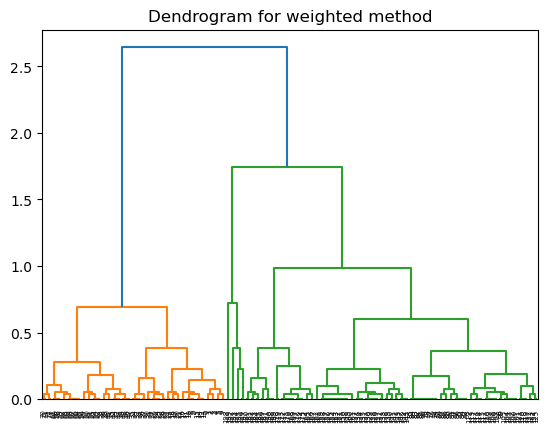

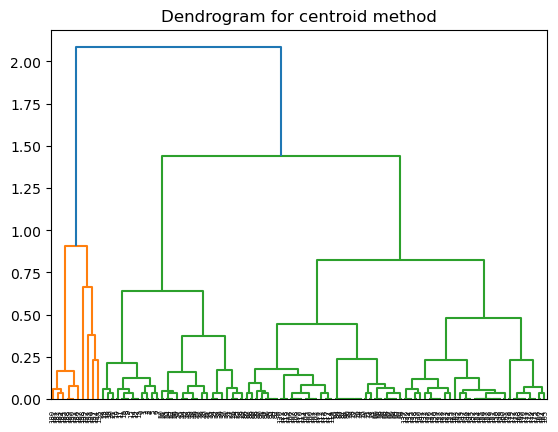

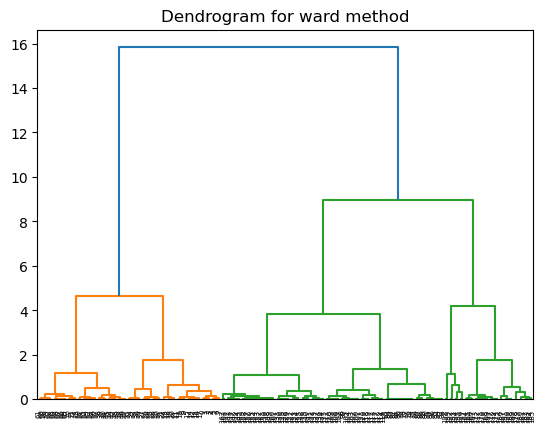

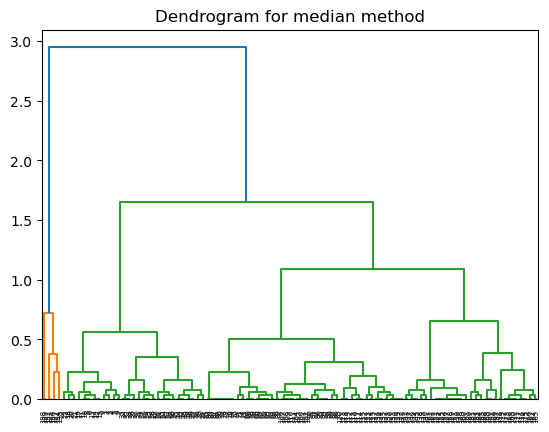



	Plotting for features: (3,)


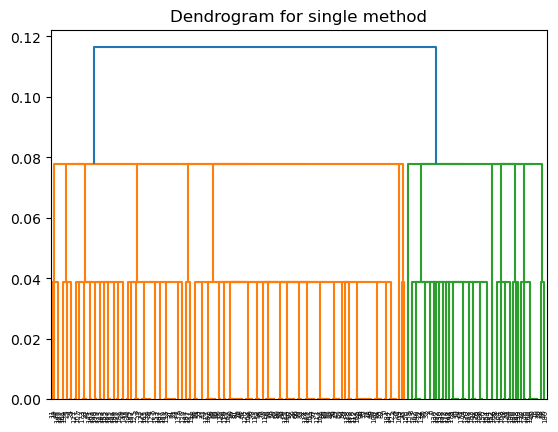

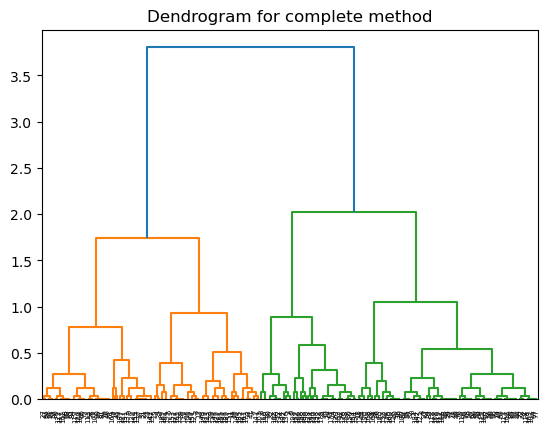

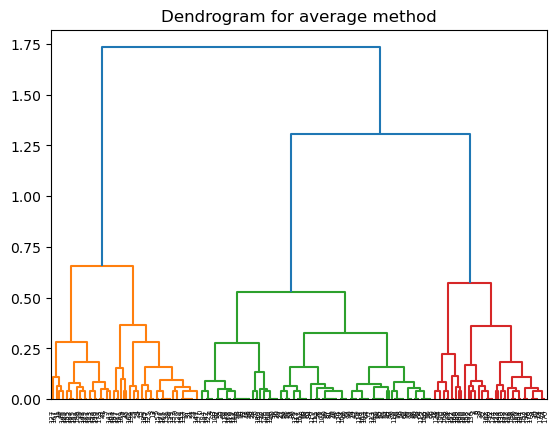

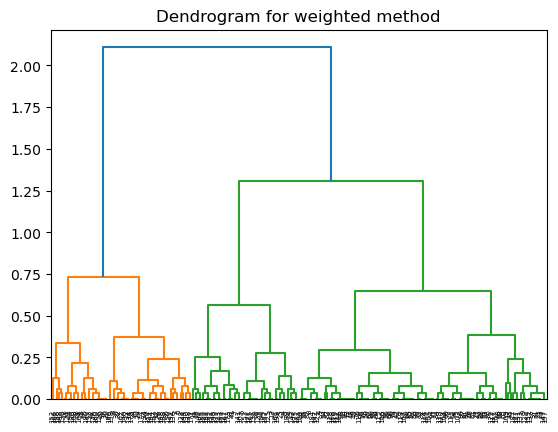

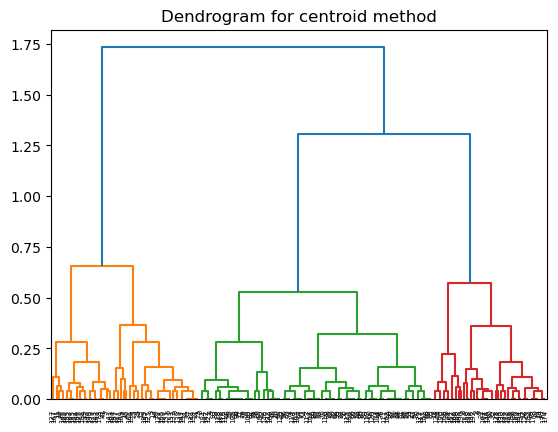

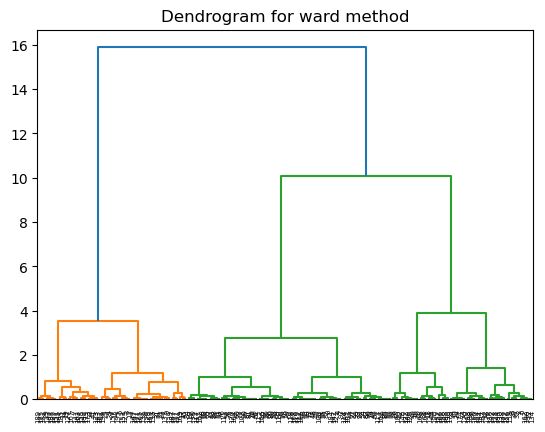

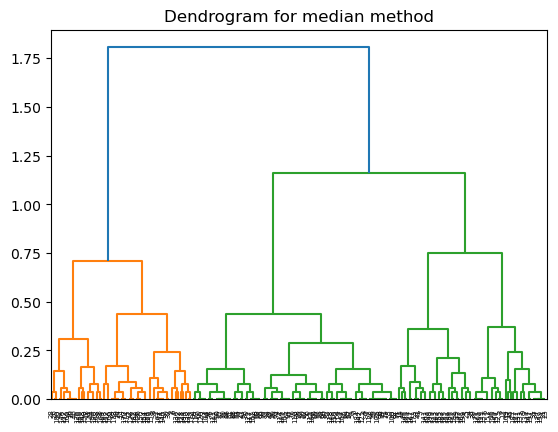



	Plotting for features: (0, 1)


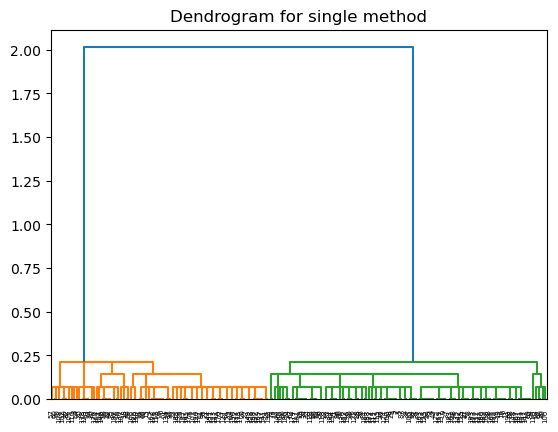

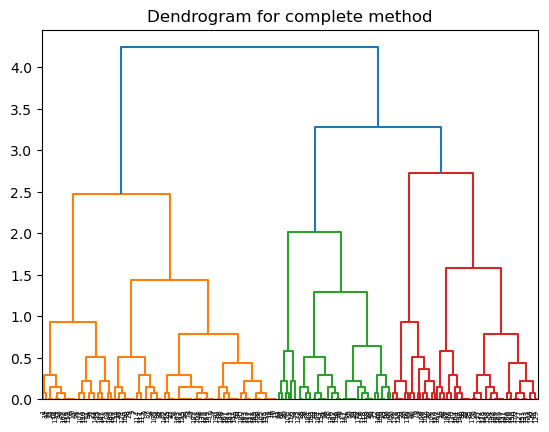

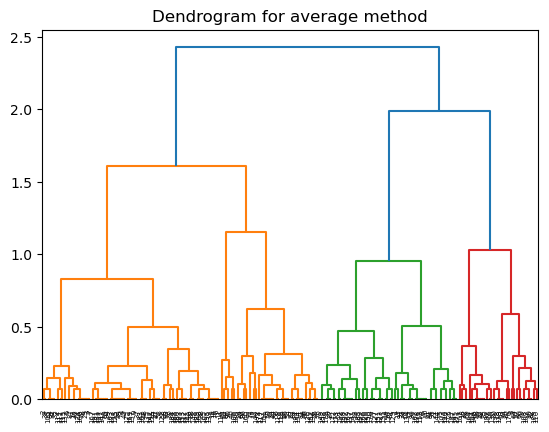

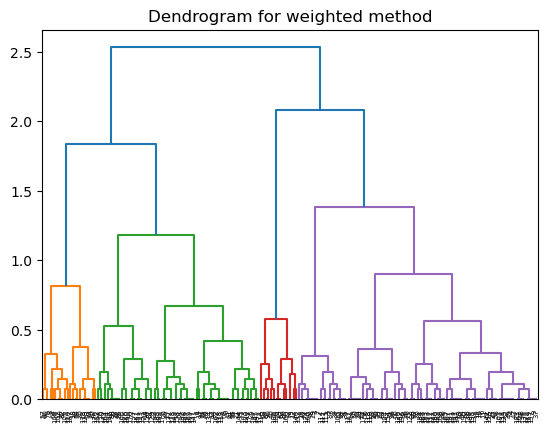

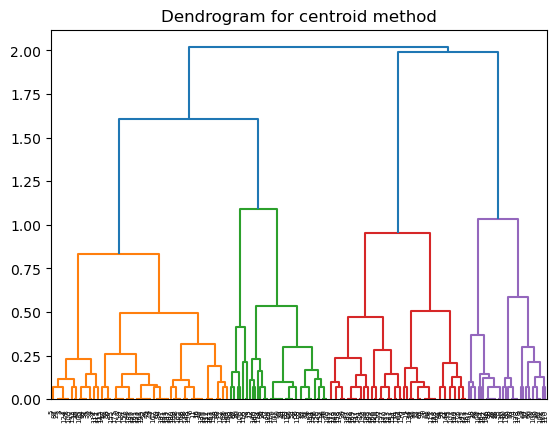

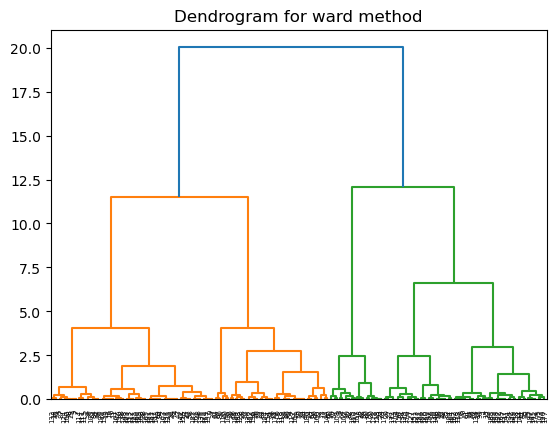

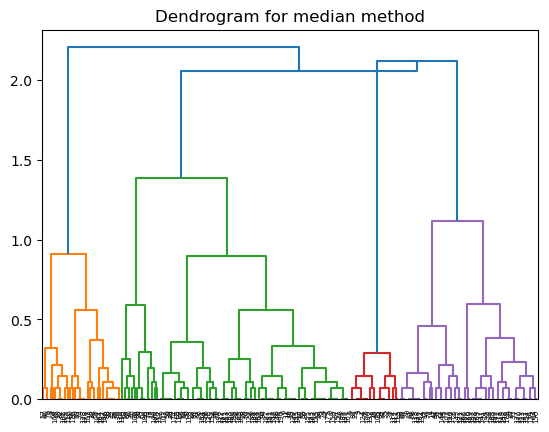



	Plotting for features: (0, 2)


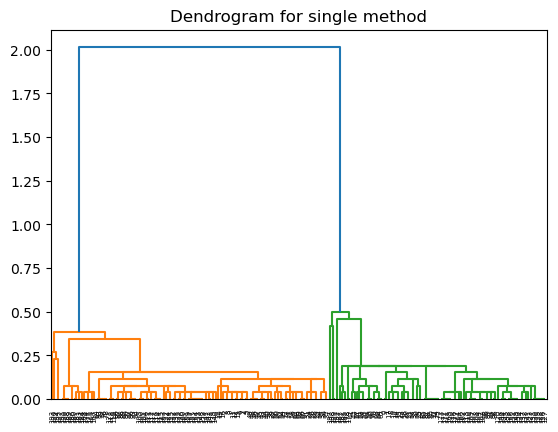

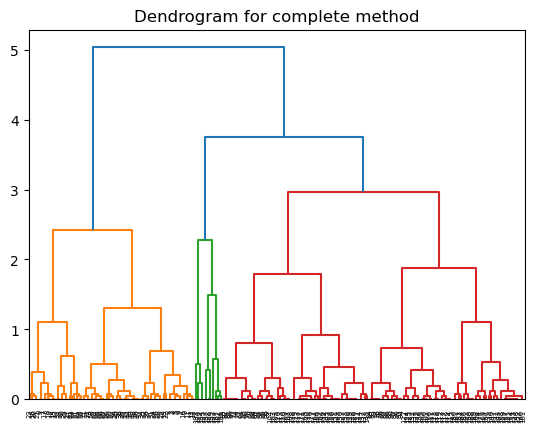

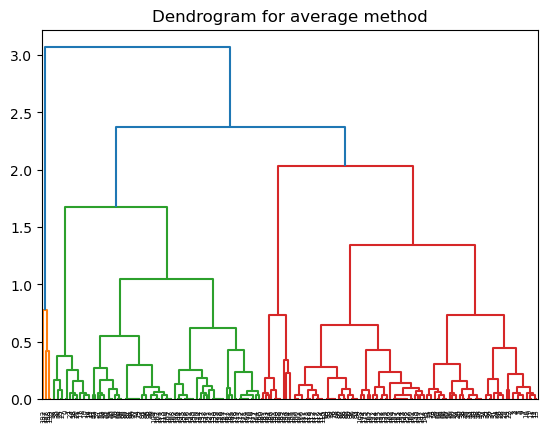

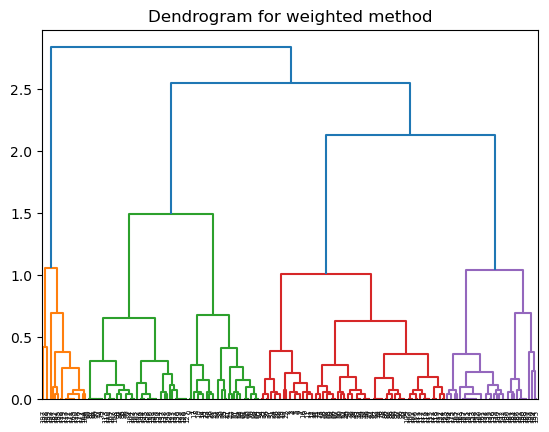

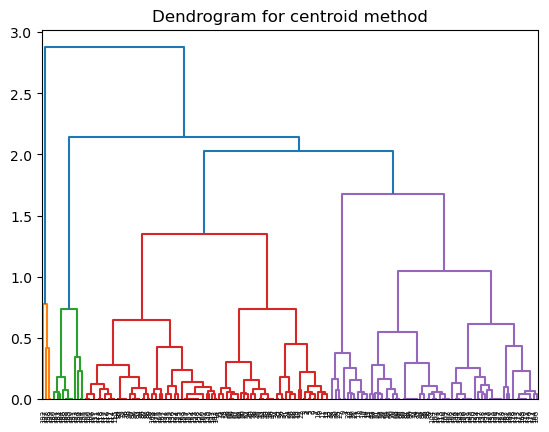

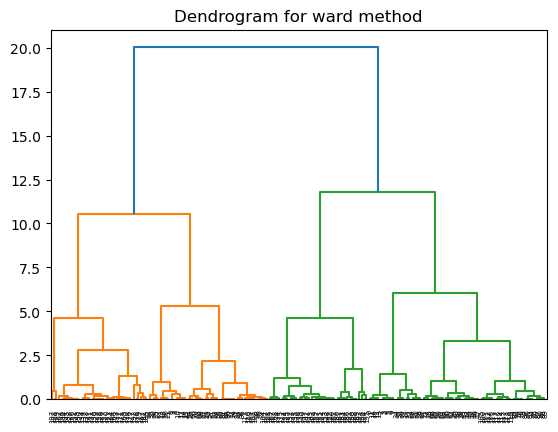

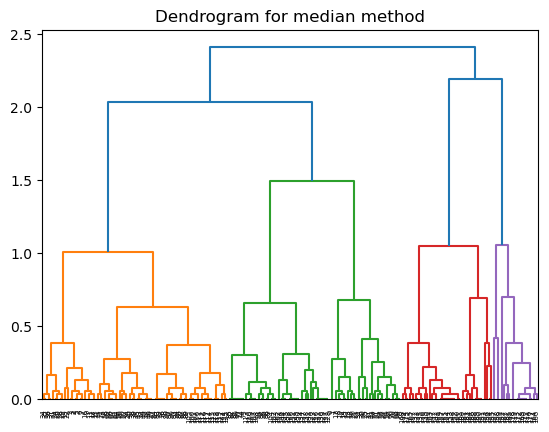



	Plotting for features: (0, 3)


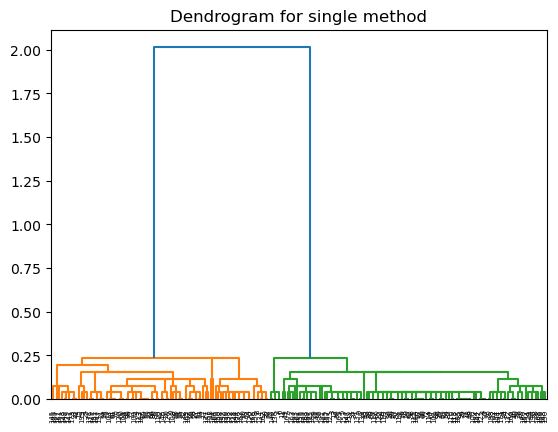

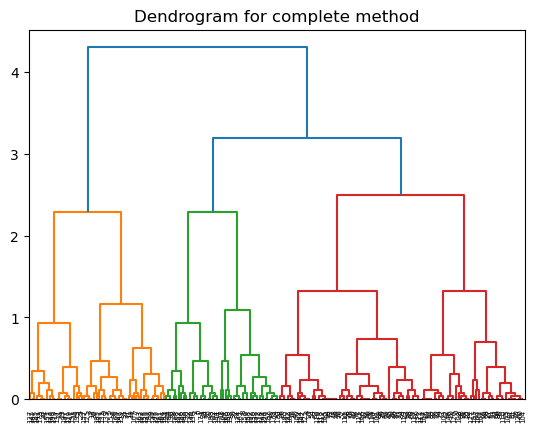

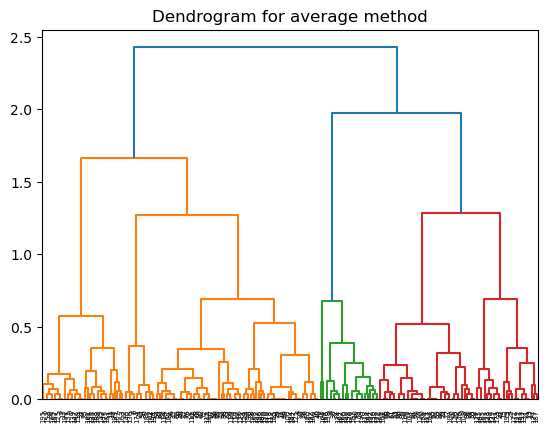

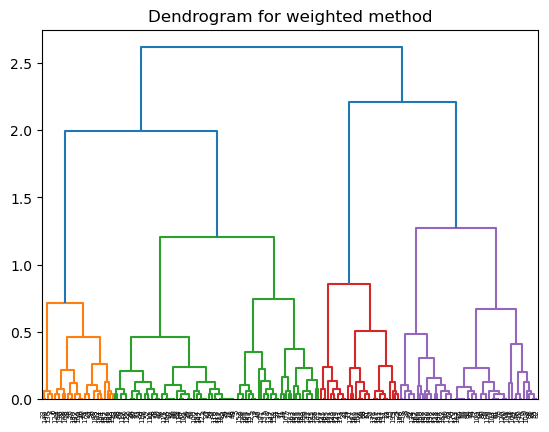

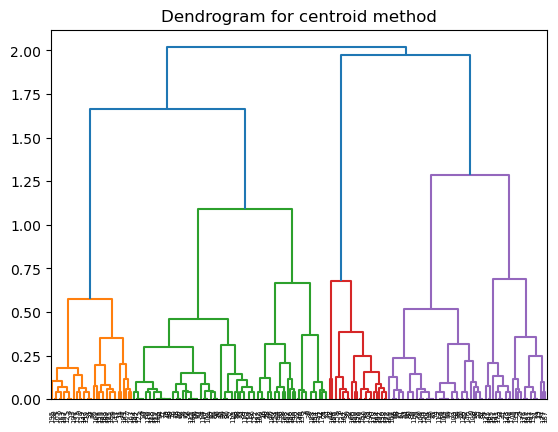

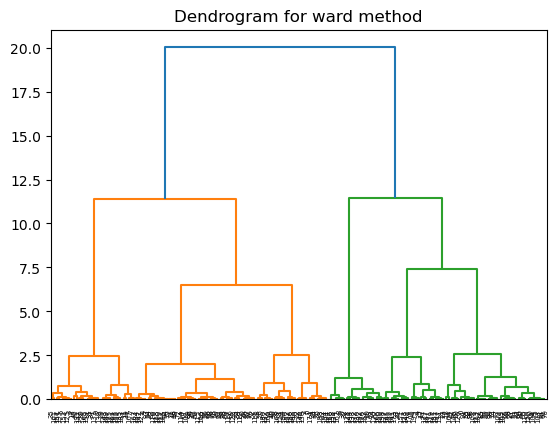

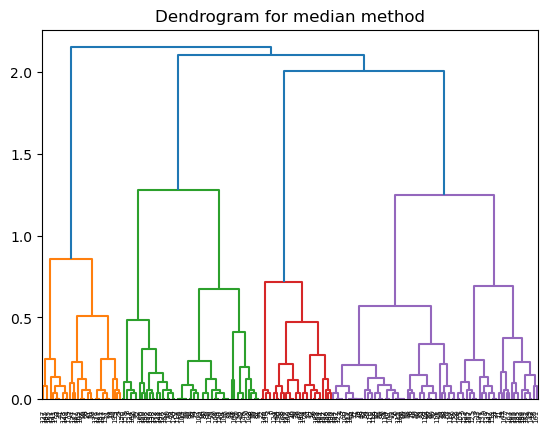



	Plotting for features: (1, 2)


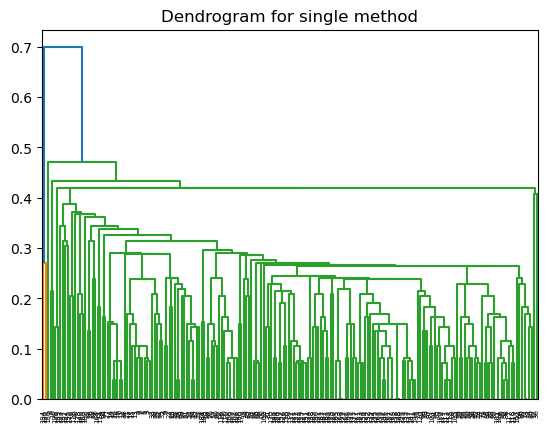

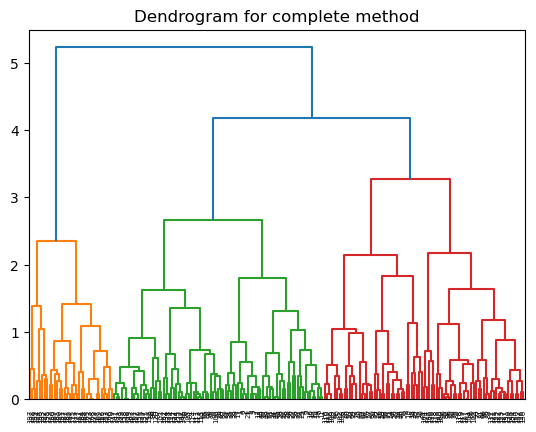

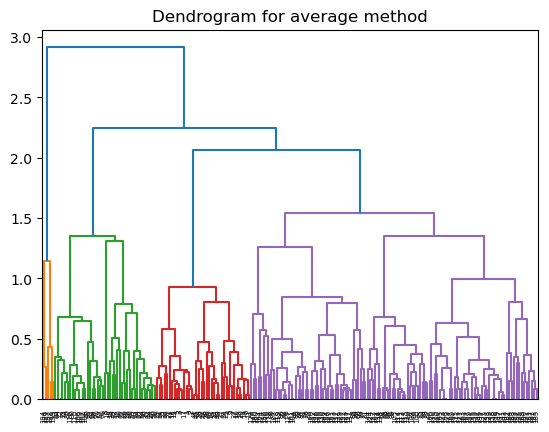

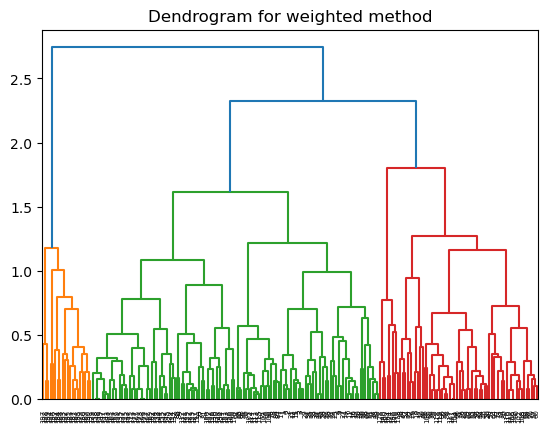

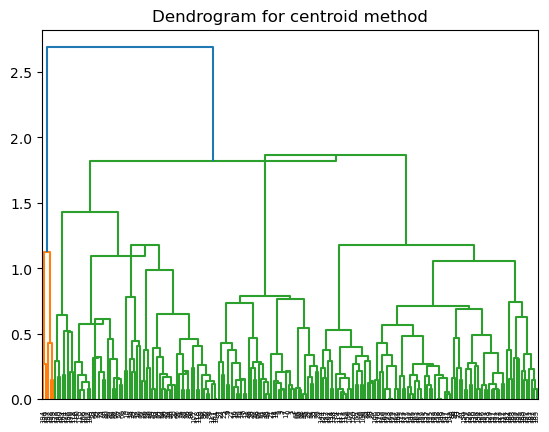

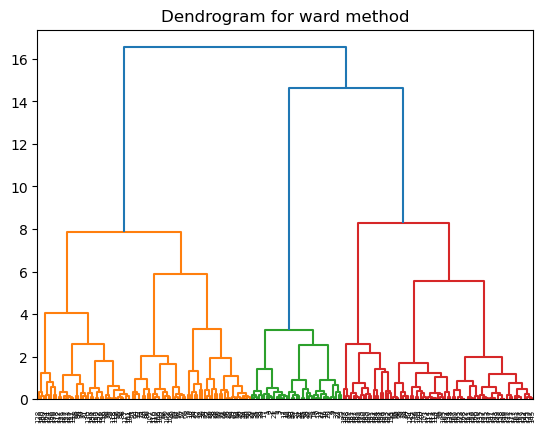

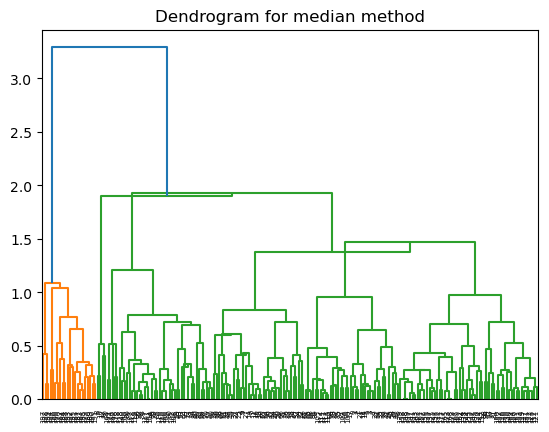



	Plotting for features: (1, 3)


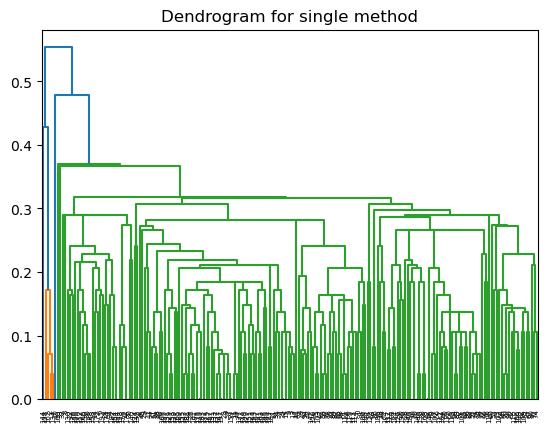

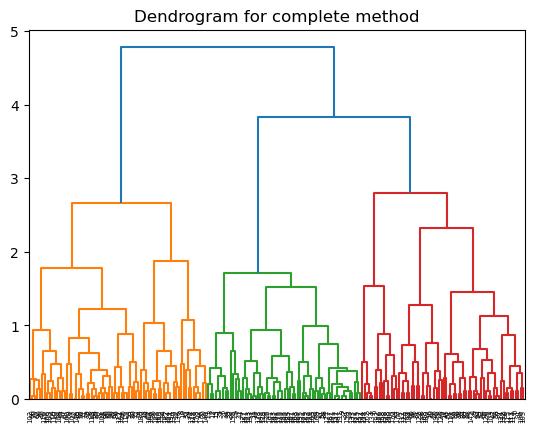

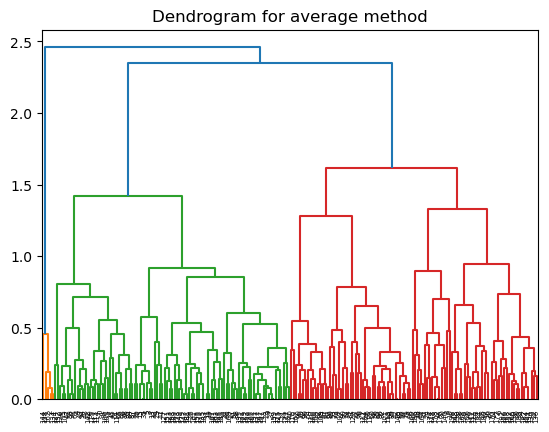

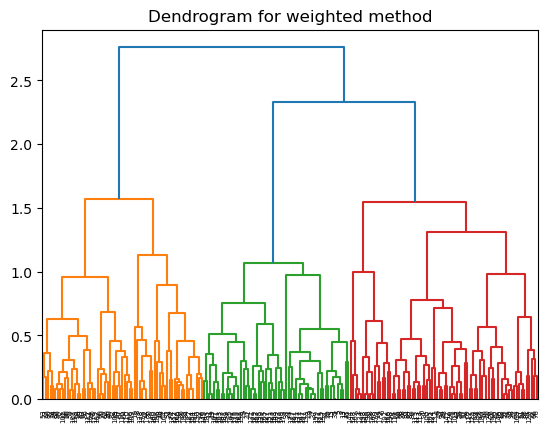

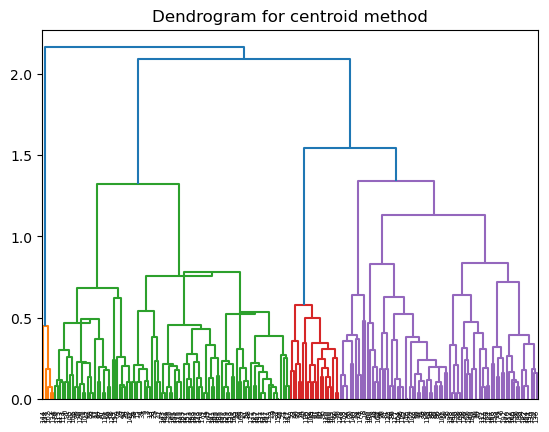

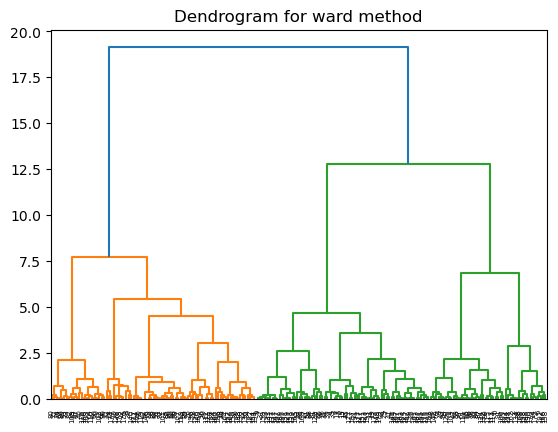

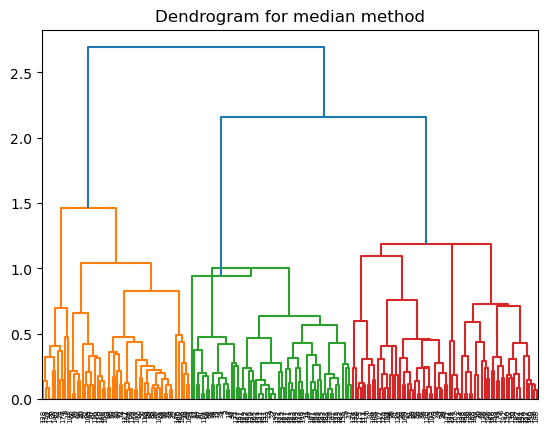



	Plotting for features: (2, 3)


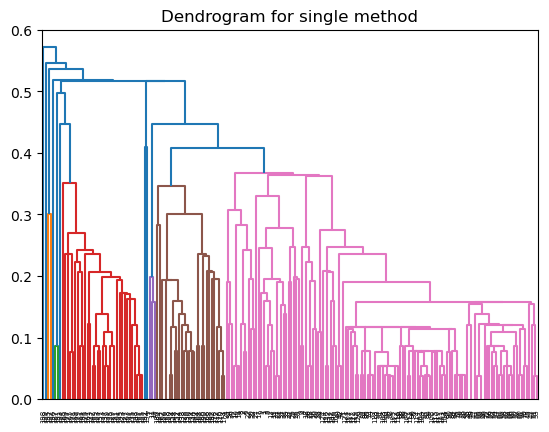

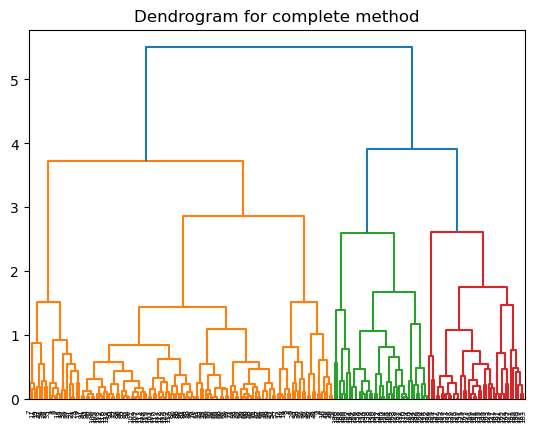

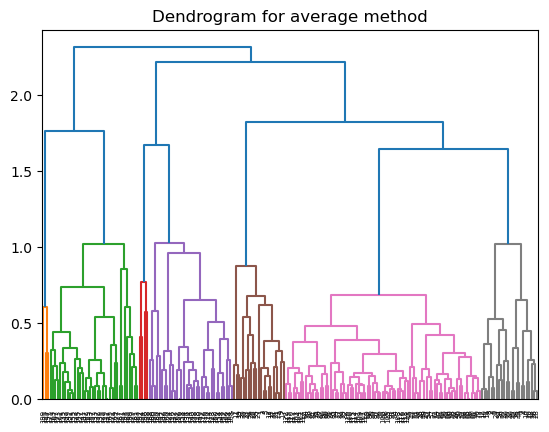

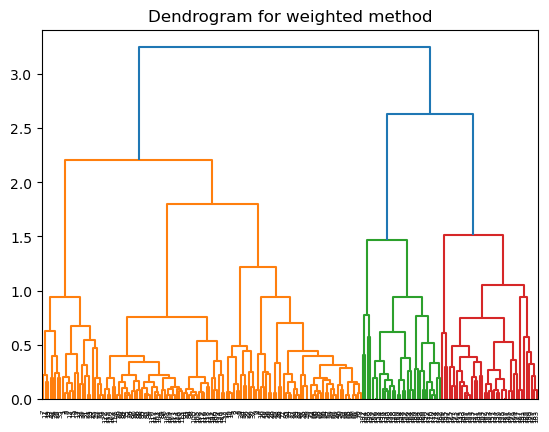

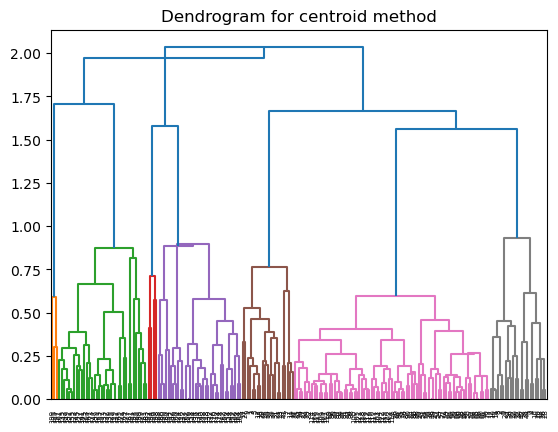

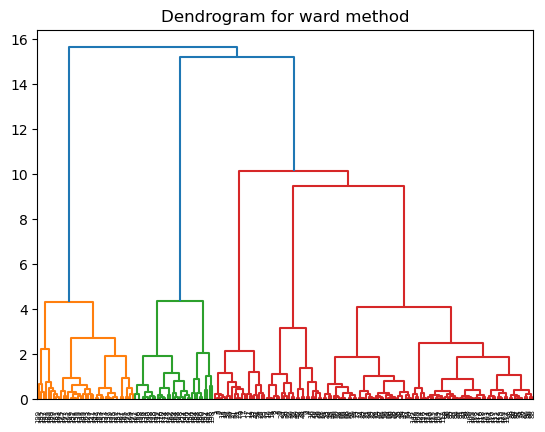

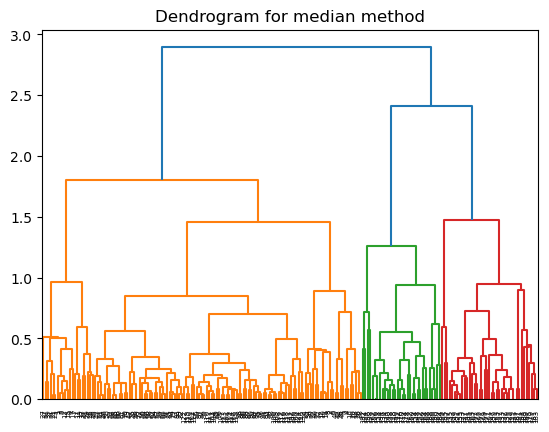



	Plotting for features: (0, 1, 2)


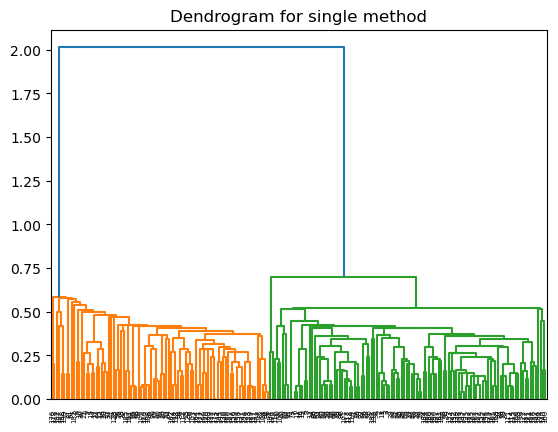

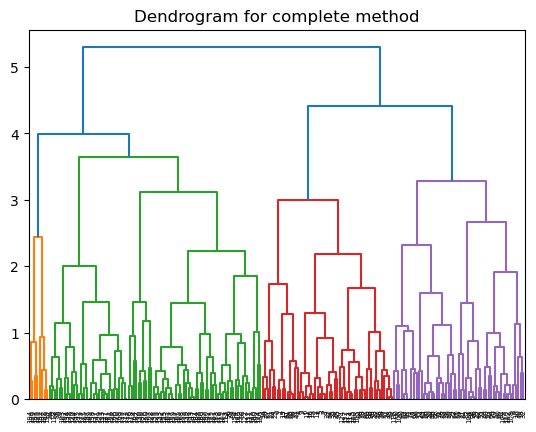

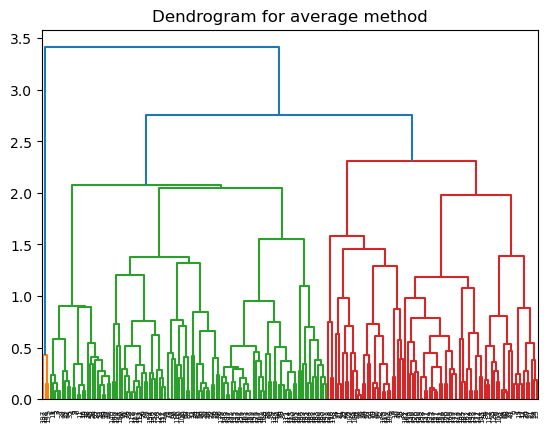

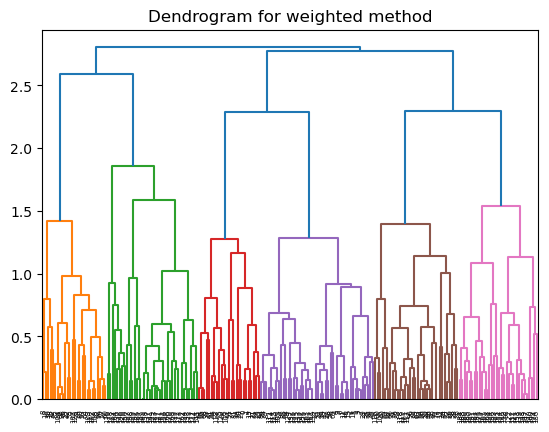

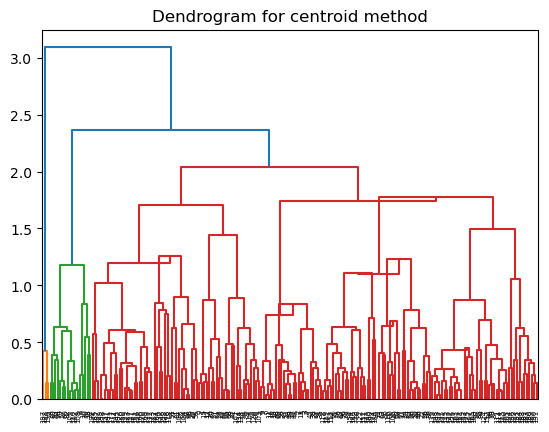

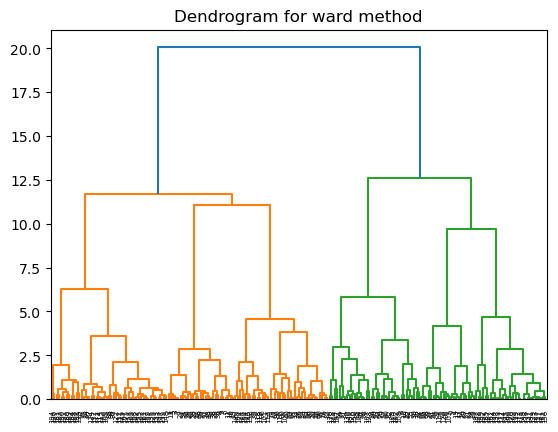

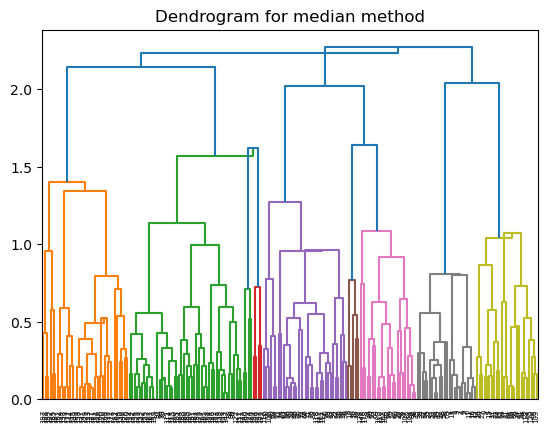



	Plotting for features: (0, 1, 3)


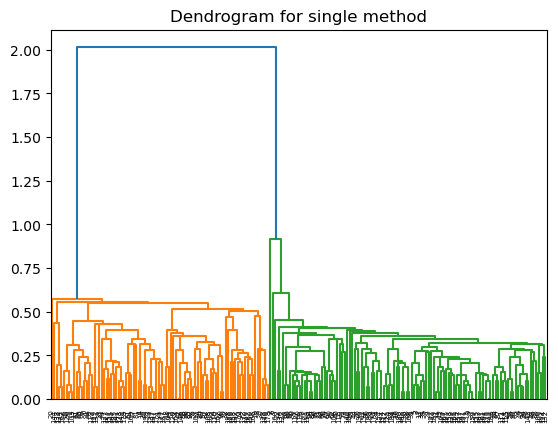

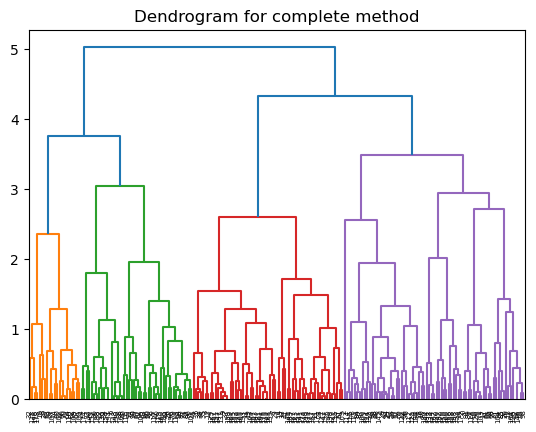

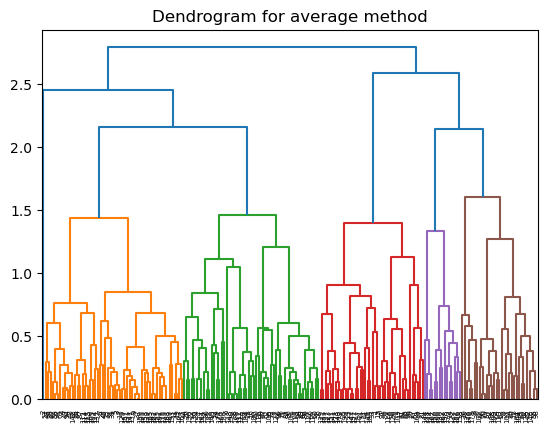

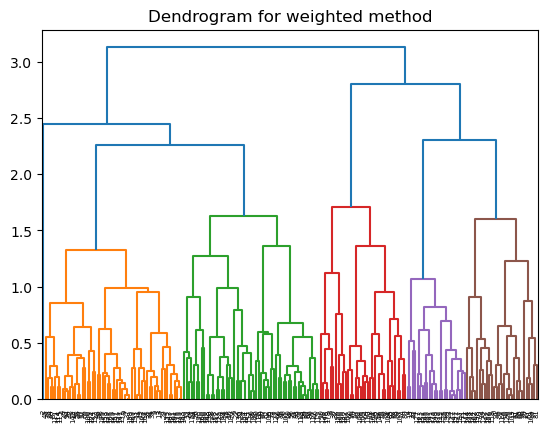

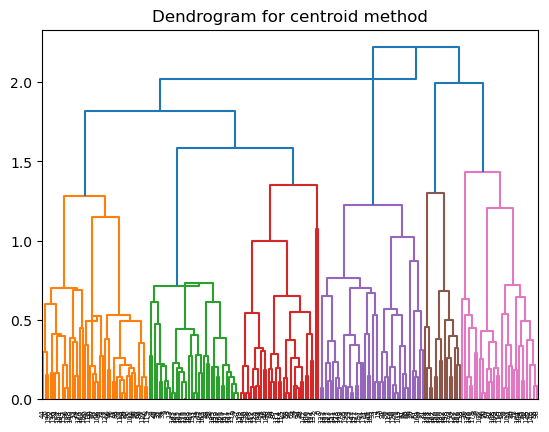

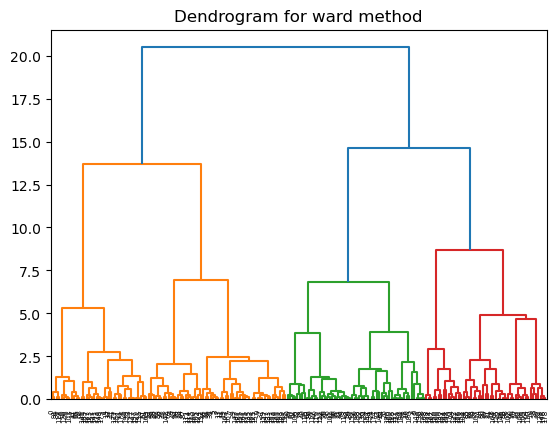

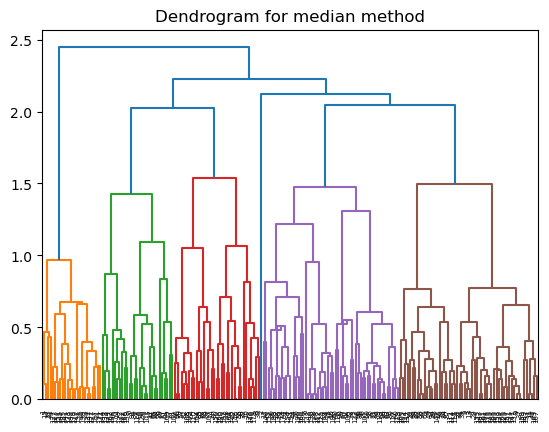



	Plotting for features: (0, 2, 3)


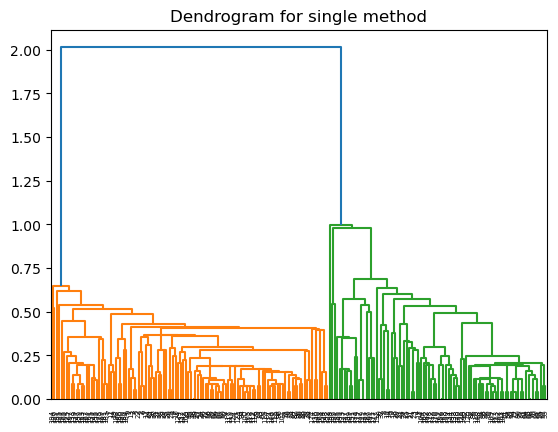

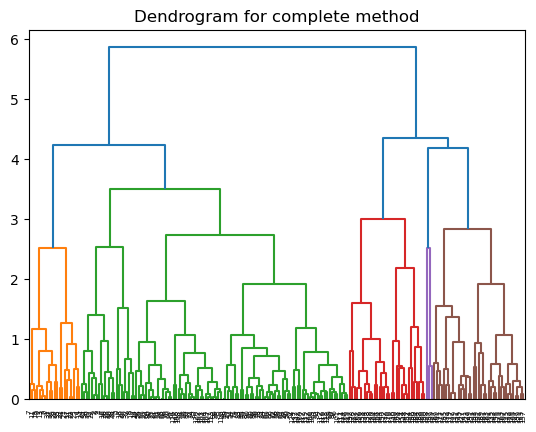

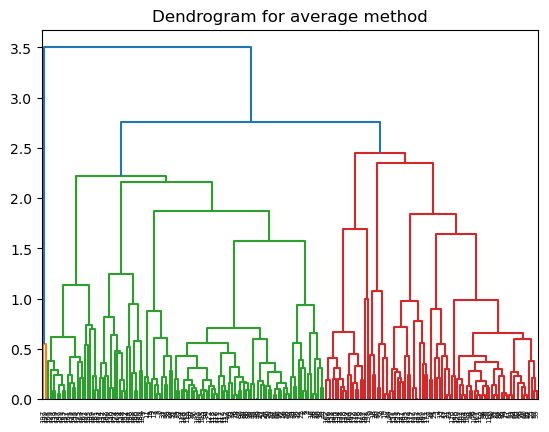

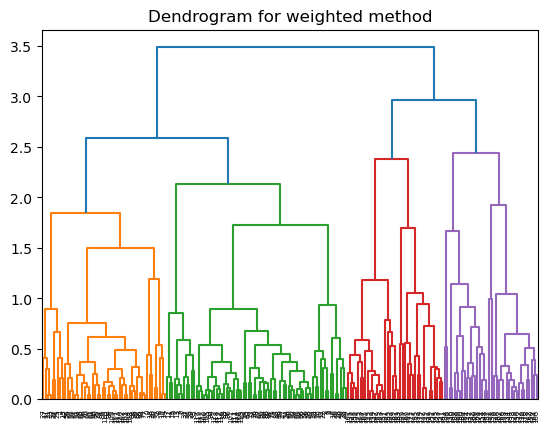

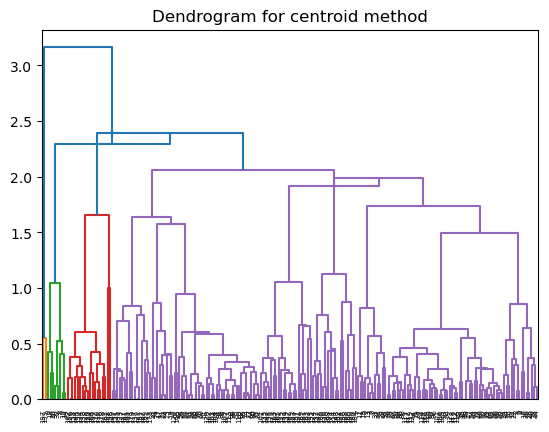

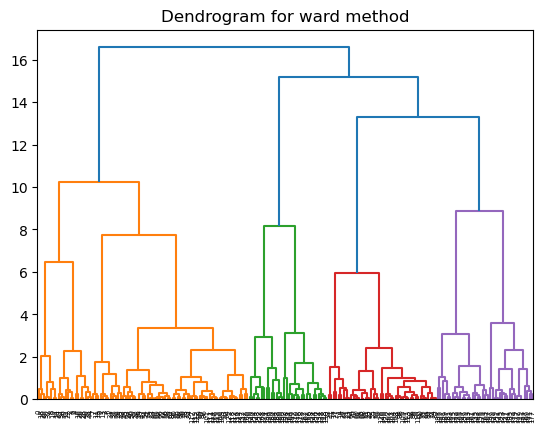

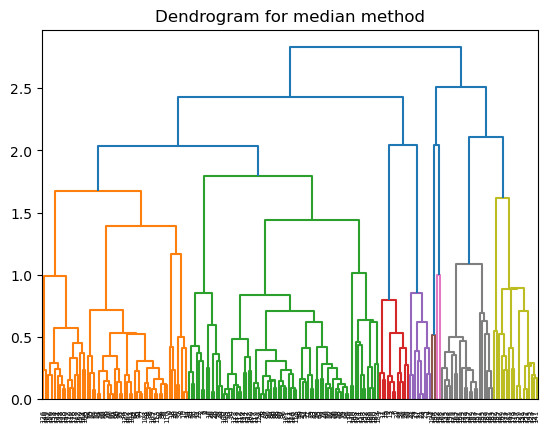



	Plotting for features: (1, 2, 3)


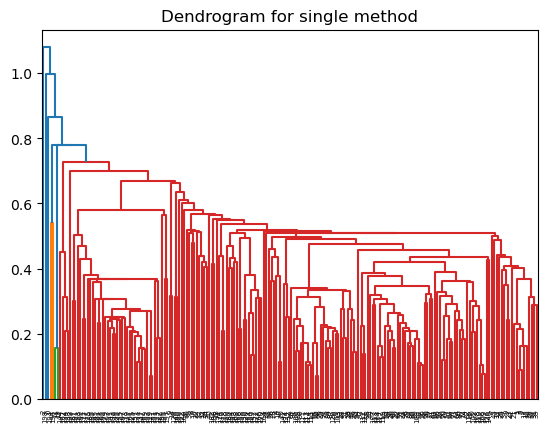

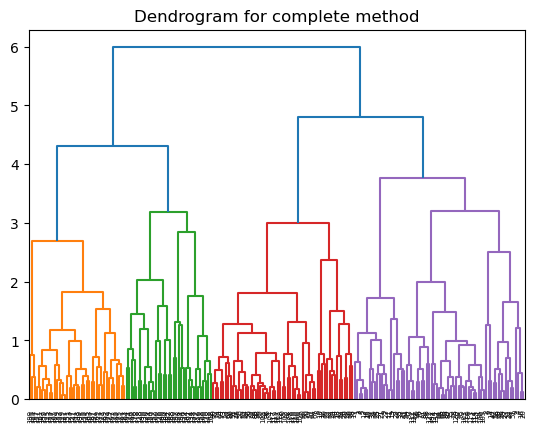

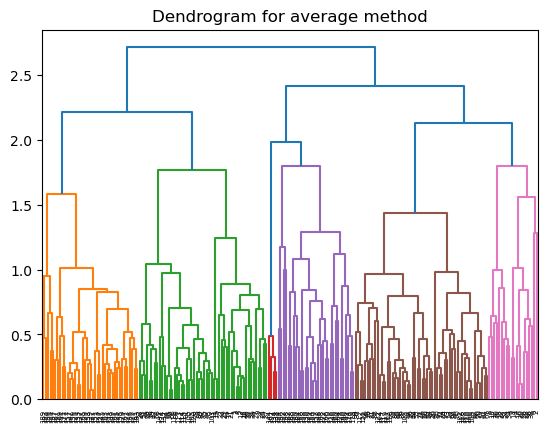

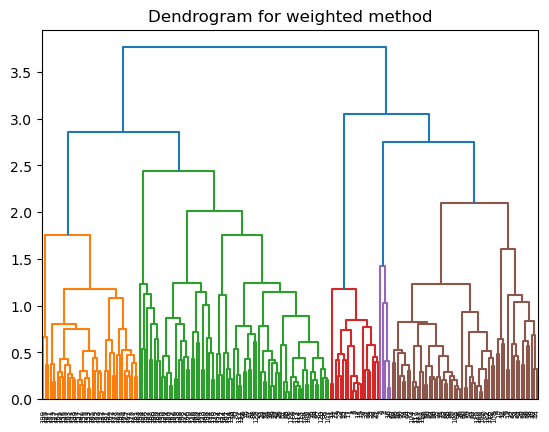

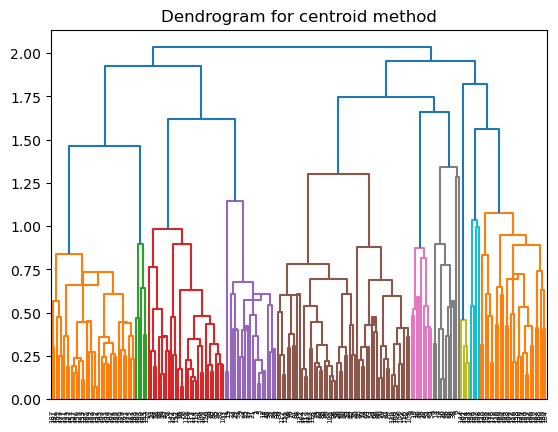

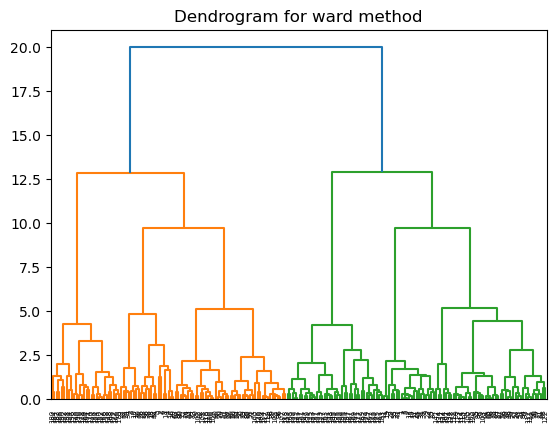

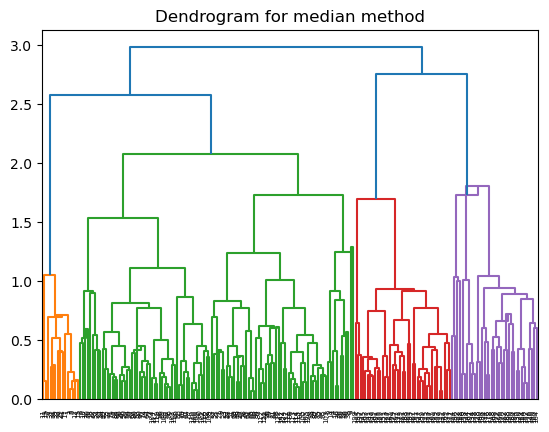



	Plotting for features: (0, 1, 2, 3)


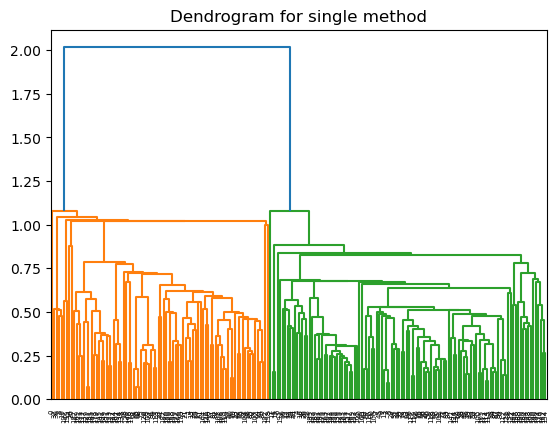

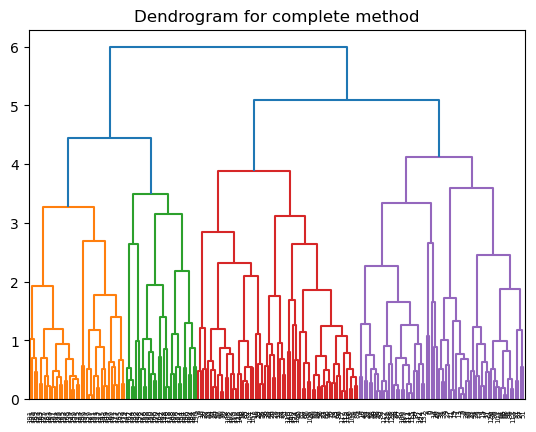

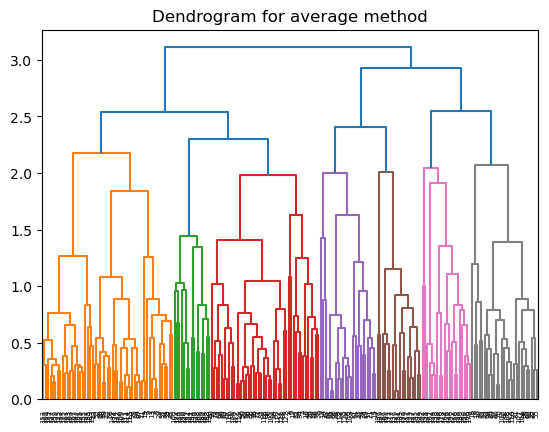

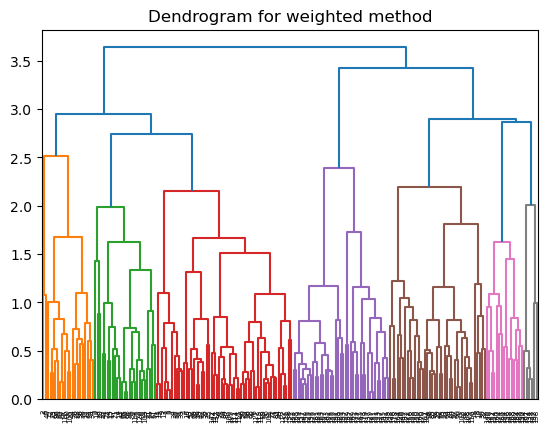

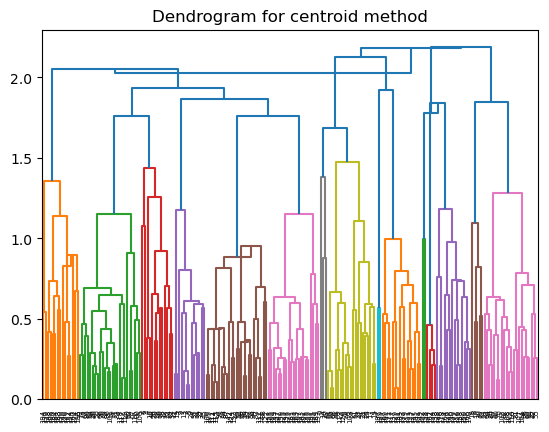

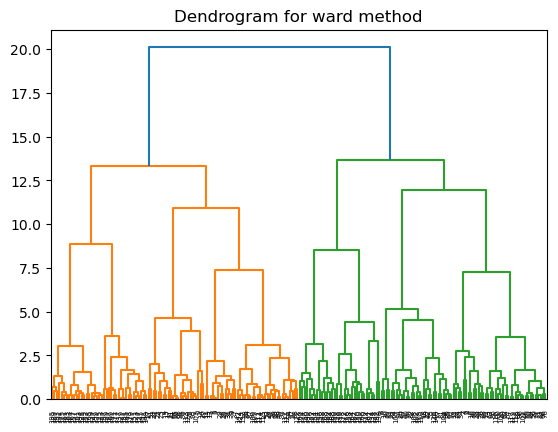

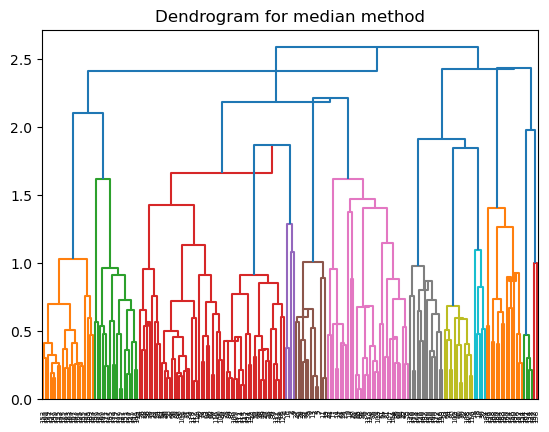

In [16]:
for feature_subset in feature_subsets:
    print("\n\n\tPlotting for features: {}".format(feature_subset))
    for linkage_method in valid_methods:
        data_subset = data[:, feature_subset]
        
        hc = HierCluster()
        linkage_matrix = hc.make_linkage(data_subset, linkage_method)
        dend = hc.draw_dendrogram(linkage_matrix)

### Observations:

1. The generated clusters are heavily influenced by the linkage and features used.
2. The single linkage method forms elongated clusters as it is very sensitive to outliers (See Single method for (0, 1))
3. The complete linkage has produced compact clusters as it uses the maximum distance. 
4. The average method seems form clusters with elongation and compactness in between the single and complete methods.
5. The centroid method has formed balanced clusters (as in number of nodes in clusters spawned from one node seem to be equal)
6. Ward's method also seems to be forming balanced clusters like centroid method. Moreover, the clusters spawned from a node seem symmetric (as in less variant wrt each other)
7. The median method seems to be very similar to the average method.
8. Features 2 & 3 (Annual Income and Spending Score) seem to be varying a lot as compared to the other features and have a smaller tendency to make balanced clusters.

### Perform hierarchical clustering on the gene expression dataset

In [30]:
data = pd.read_csv('q3-resources/gene.csv')
data

ID_REF     GSM613412     GSM613413     GSM613414    GSM613415  \
0   10338001   5192.230000   5974.650000   5393.020000   5158.65000   
1   10338002    301.503000    307.677000    362.596000    372.77600   
2   10338003   1850.110000   2037.540000   1891.180000   1752.97000   
3   10338004    927.983000   1140.820000    936.433000    918.44000   
4   10338005      5.249740      5.017300      5.095850      3.76912   
5   10338006      9.387960      8.481250      8.842170      6.57887   
6   10338007     21.053700     21.974900     20.089100     18.08180   
7   10338008     48.830500     52.573200     48.165400     52.53910   
8   10338009    677.660000    736.404000    913.221000    833.52800   
9   10338010      5.663750      6.366670      4.817760      4.89682   
10  10338011    159.938000    153.161000    179.848000    180.23800   
11  10338012      6.077780      6.899930      5.879660      4.81598   
12  10338013      4.171750      3.707450      4.045620      3.15800   
13  10338014      3.516370      3.979100      3.881400      3.68439   
14  10338015      4.228040      3.554860      3.935910      3.92517   
15  10338016    502.815000    540.120000    633.855000    641.55000   
16  10338017  10933.900000  13993.000000  11860.100000  12107.10000   
17  10338018    268.682000    284.949000    362.186000    370.72500   
18  10338019    101.489000     99.588200    121.828000    122.19700   
19  10338020    463.635000    508.638000    609.197000    608.10200   
20  10338021     10.869900     11.363700     10.528900      9.81449   
21  10338022      8.529890      8.184310      9.229730      6.99232   
22  10338023     23.420900     23.801800     25.423300     27.15610   
23  10338024    324.285000    318.359000    410.300000    424.18700   
24  10338025    778.989000    911.468000    864.857000    786.49300   
25  10338026  12998.800000  15354.800000  12978.300000  13179.30000   
26  10338027    327.894000    348.003000    438.134000    461.20900   
27  10338028     64.516100     63.911400     74.809500     76.21920   
28  10338029   1436.920000   1941.550000   1564.770000   1555.62000   
29  10338030      4.696220      4.706710      4.623350      4.12100   
30  10338031      2.839580      3.266610      3.645730      2.96922   
31  10338032      3.679480      3.897510      3.681080      3.22762   
32  10338033    232.688000    229.680000    287.278000    310.38700   
33  10338034     40.920100     44.639300     41.191400     34.80280   
34  10338035   1011.740000   1109.170000   1010.220000    931.29600   
35  10338036    994.982000   1287.410000   1015.170000    954.25500   
36  10338037    140.905000    208.598000    263.172000    259.58200   
37  10338038      0.006021      0.001961      0.871053      0.75054   
38  10338039    588.679000    611.223000    705.474000    764.96700   
39  10338040     59.609800     58.245700     69.448500     67.11180   
40  10338041   2619.670000   3844.150000   2869.160000   2905.59000   
41  10338042   1419.700000   1783.690000   1539.990000   1378.23000   
42  10338043      2.519230      2.089570      2.414880      2.50475   
43  10338044   4990.030000   6539.160000   5305.390000   5122.29000   
44  10338045    412.888000    637.925000    554.701000    423.63700   
45  10338046     52.846000     55.478500     59.841500     54.44940   
46  10338047    203.933000    373.362000    538.330000    481.27500   
47  10338048     36.660900     38.151300     36.292200     32.14380   
48  10338049    776.873000    878.530000   1009.740000   1004.31000   
49  10338050      3.680730      4.274630      4.492300      3.91677   
50  10338051    121.803000    125.831000    152.816000    154.48700   
51  10338052     13.061200     16.012700     13.734000     11.71690   
52  10338053    437.815000    476.199000    581.702000    602.43200   
53  10338054     72.556700     70.606700     90.670000     92.86140   
54  10338055    566.463000    633.553000    708.877000    732.65200   
55  10338056     85.726700    

In [31]:
# dropping some irrelevant columns
data = data.drop(columns=['ID_REF'], axis=1)
data

GSM613412     GSM613413     GSM613414    GSM613415    GSM613416  \
0    5192.230000   5974.650000   5393.020000   5158.65000   5244.96000   
1     301.503000    307.677000    362.596000    372.77600    299.98000   
2    1850.110000   2037.540000   1891.180000   1752.97000   1718.80000   
3     927.983000   1140.820000    936.433000    918.44000    930.31300   
4       5.249740      5.017300      5.095850      3.76912      5.54982   
5       9.387960      8.481250      8.842170      6.57887      7.93186   
6      21.053700     21.974900     20.089100     18.08180     19.94690   
7      48.830500     52.573200     48.165400     52.53910     45.28810   
8     677.660000    736.404000    913.221000    833.52800    797.24600   
9       5.663750      6.366670      4.817760      4.89682      5.17924   
10    159.938000    153.161000    179.848000    180.23800    154.86700   
11      6.077780      6.899930      5.879660      4.81598      5.58604   
12      4.171750      3.707450      4.045620      3.15800      3.69609   
13      3.516370      3.979100      3.881400      3.68439      3.50930   
14      4.228040      3.554860      3.935910      3.92517      3.64093   
15    502.815000    540.120000    633.855000    641.55000    564.42500   
16  10933.900000  13993.000000  11860.100000  12107.10000  12568.30000   
17    268.682000    284.949000    362.186000    370.72500    306.61800   
18    101.489000     99.588200    121.828000    122.19700    101.85800   
19    463.635000    508.638000    609.197000    608.10200    523.61800   
20     10.869900     11.363700     10.528900      9.81449      9.27331   
21      8.529890      8.184310      9.229730      6.99232      7.96070   
22     23.420900     23.801800     25.423300     27.15610     23.87230   
23    324.285000    318.359000    410.300000    424.18700    338.67600   
24    778.989000    911.468000    864.857000    786.49300    786.91100   
25  12998.800000  15354.800000  12978.300000  13179.30000  14184.40000   
26    327.894000    348.003000    438.134000    461.20900    373.66400   
27     64.516100     63.911400     74.809500     76.21920     69.70330   
28   1436.920000   1941.550000   1564.770000   1555.62000   1469.89000   
29      4.696220      4.706710      4.623350      4.12100      4.17565   
30      2.839580      3.266610      3.645730      2.96922      3.08852   
31      3.679480      3.897510      3.681080      3.22762      3.31246   
32    232.688000    229.680000    287.278000    310.38700    242.89300   
33     40.920100     44.639300     41.191400     34.80280     37.97520   
34   1011.740000   1109.170000   1010.220000    931.29600    955.52900   
35    994.982000   1287.410000   1015.170000    954.25500   1043.95000   
36    140.905000    208.598000    263.172000    259.58200    216.11700   
37      0.006021      0.001961      0.871053      0.75054      1.50373   
38    588.679000    611.223000    705.474000    764.96700    647.39800   
39     59.609800     58.245700     69.448500     67.11180     55.67060   
40   2619.670000   3844.150000   2869.160000   2905.59000   3197.21000   
41   1419.700000   1783.690000   1539.990000   1378.23000   1530.66000   
42      2.519230      2.089570      2.414880      2.50475      2.40912   
43   4990.030000   6539.160000   5305.390000   5122.29000   5488.48000   
44    412.888000    637.925000    554.701000    423.63700    589.88000   
45     52.846000     55.478500     59.841500     54.44940     51.00440   
46    203.933000    373.362000    538.330000    481.27500    379.89500   
47     36.660900     38.151300     36.292200     32.14380     33.34840   
48    776.873000    878.530000   1009.740000   1004.31000    886.51200   
49      3.680730      4.274630      4.492300      3.91677      3.58907   
50    121.803000    125.831000    152.816000    154.48700    132.57900   
51     13.061200     16.012700     13.734000     11.71690     13.63630   
52    437.815000    476.199000    581.702000    602.43200    523.08500   
53     72.5

In [32]:
# normalizing data
scaler = StandardScaler()
data = scaler.fit_transform(data)
data.shape

(58, 12)

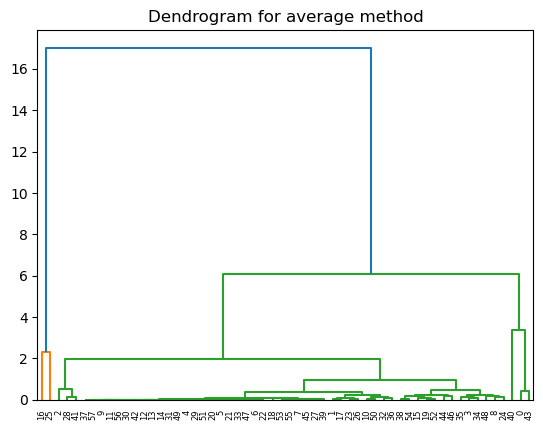

In [33]:
valid_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward', 'median'] # reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

hc = HierCluster()
linkage_matrix = hc.make_linkage(data, 'average')
dend = hc.draw_dendrogram(linkage_matrix)

In [34]:
features_used = list(range(0, data.shape[1]))
features_used

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [43]:
feature_subsets = []
for i in powerset(features_used):
    if (len(i) > 0):
        feature_subsets.append(i)

# choosing 6 subsets at random
import random
feature_subsets = random.sample(feature_subsets, 6)
        
feature_subsets

[(0, 2, 5, 6, 9, 11),
 (1, 4, 6, 8, 10, 11),
 (0, 1, 5, 7, 11),
 (2, 4, 8, 10, 11),
 (0, 1, 2, 3, 6, 8, 9),
 (1, 3, 5, 7, 11)]



	Plotting for features: (0, 2, 5, 6, 9, 11)


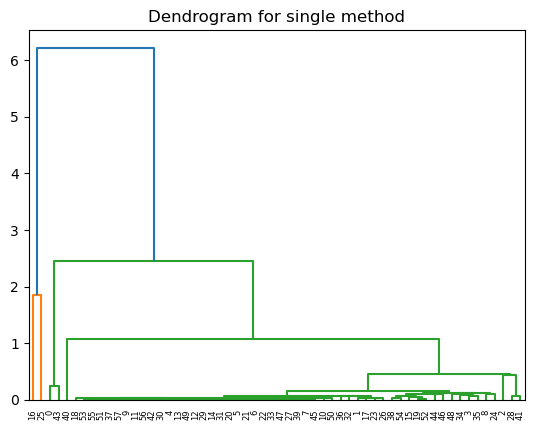

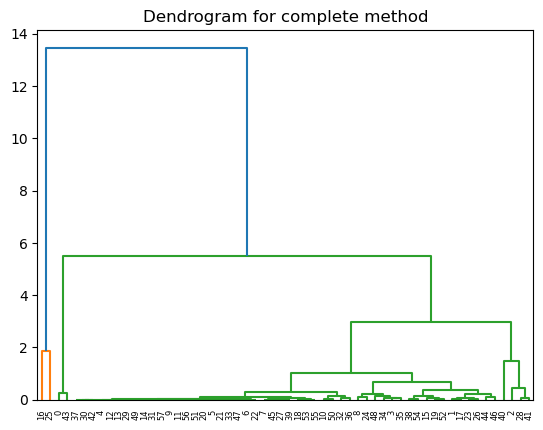

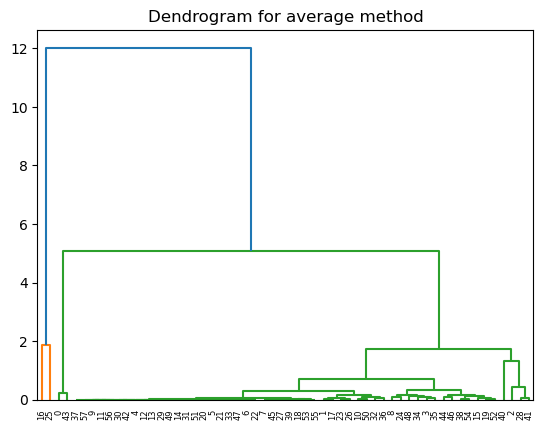

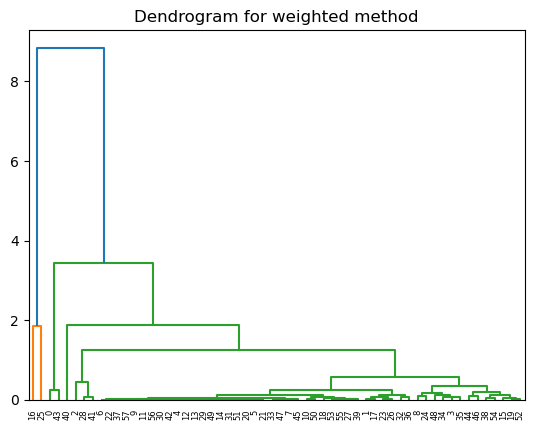

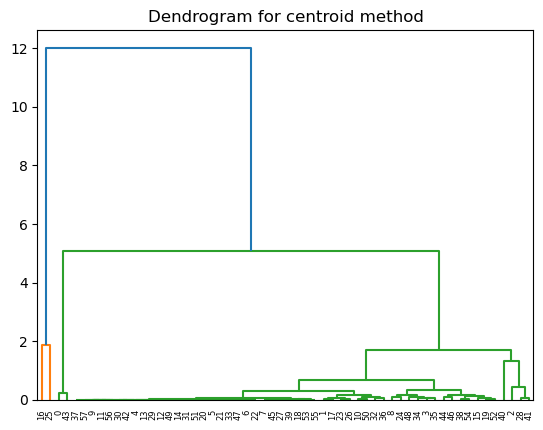

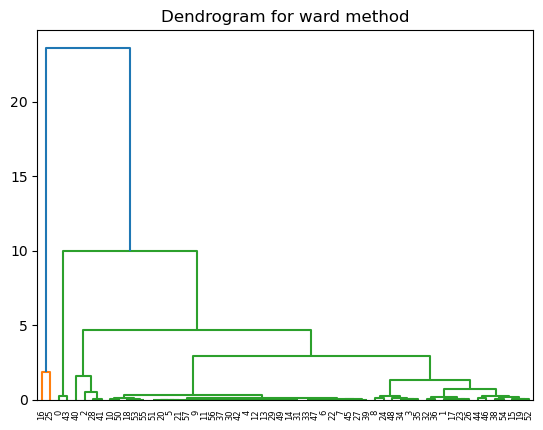

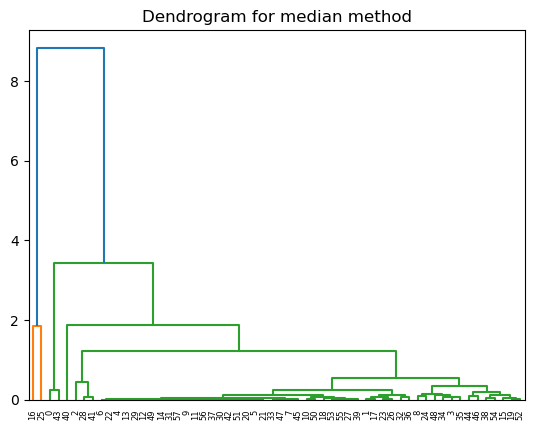



	Plotting for features: (1, 4, 6, 8, 10, 11)


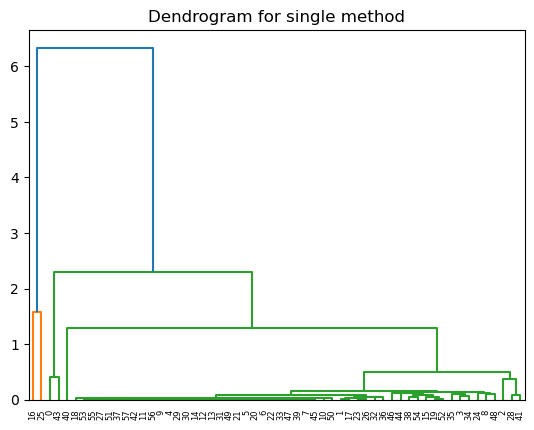

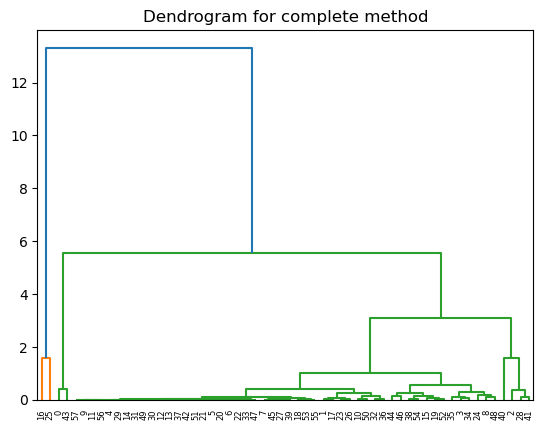

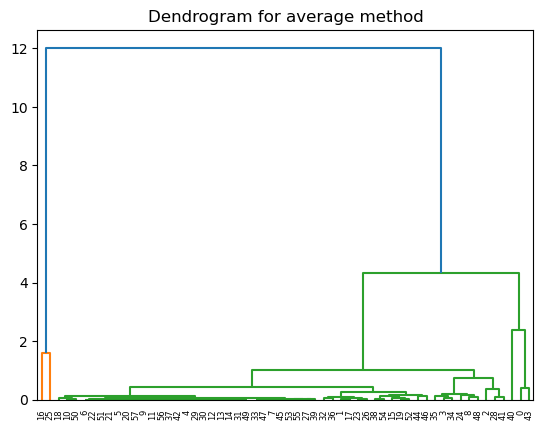

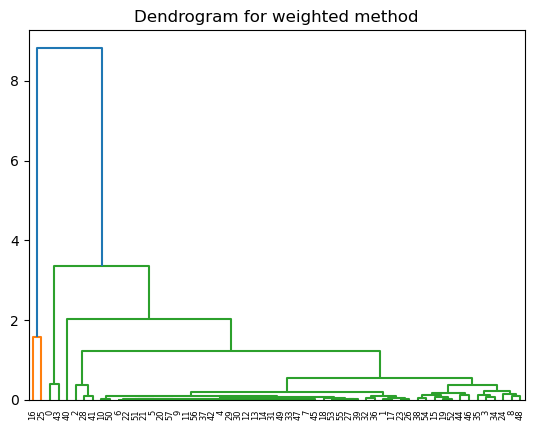

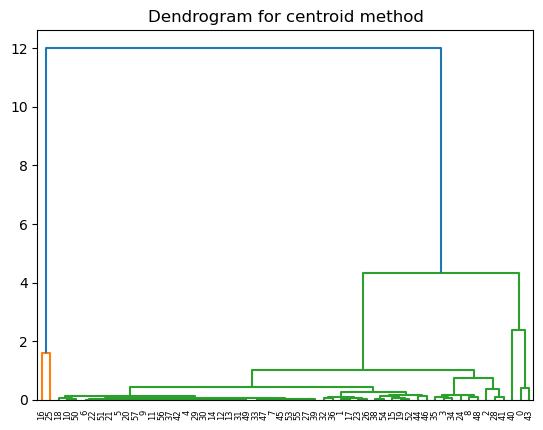

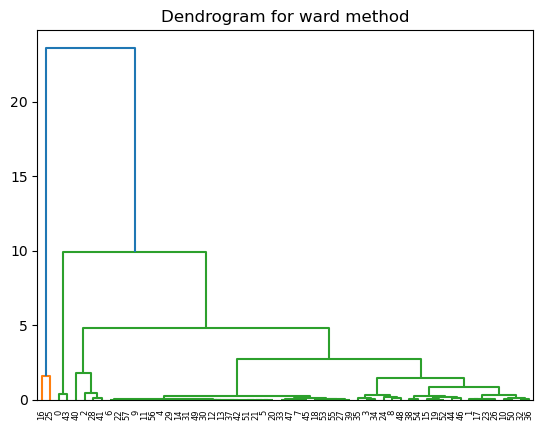

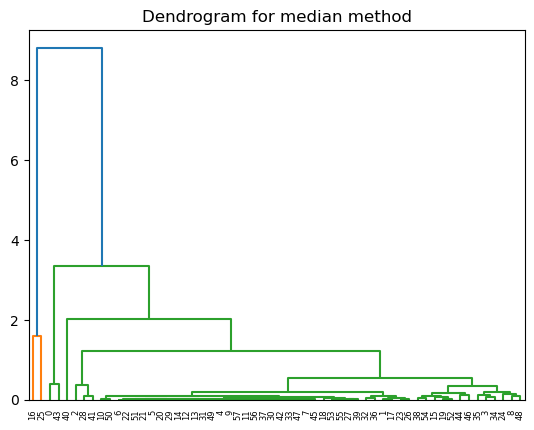



	Plotting for features: (0, 1, 5, 7, 11)


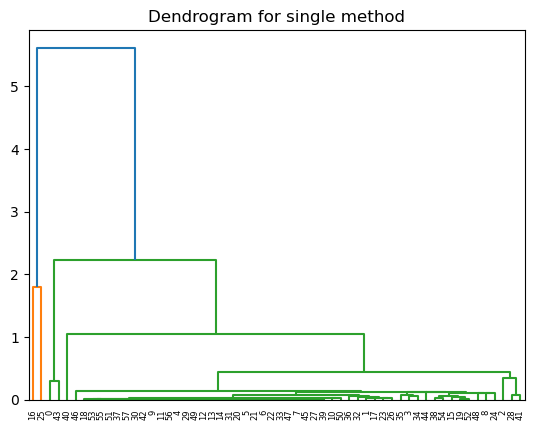

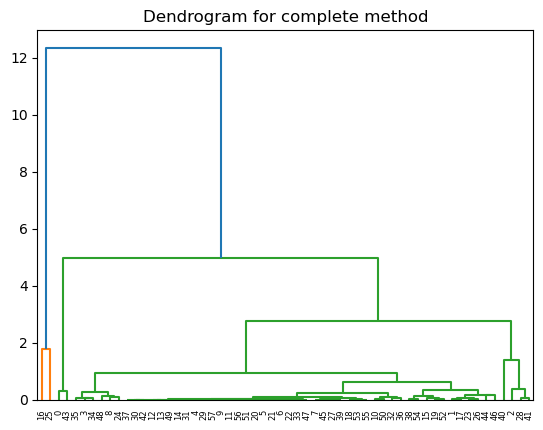

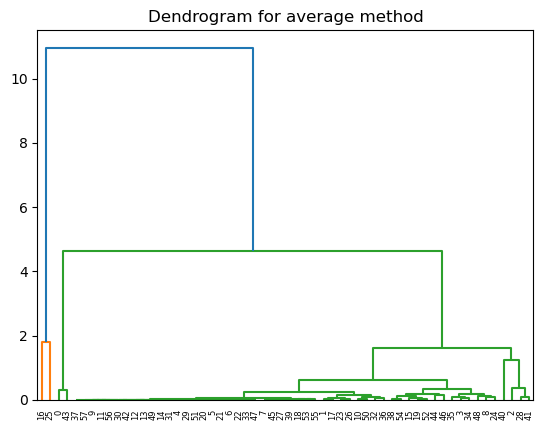

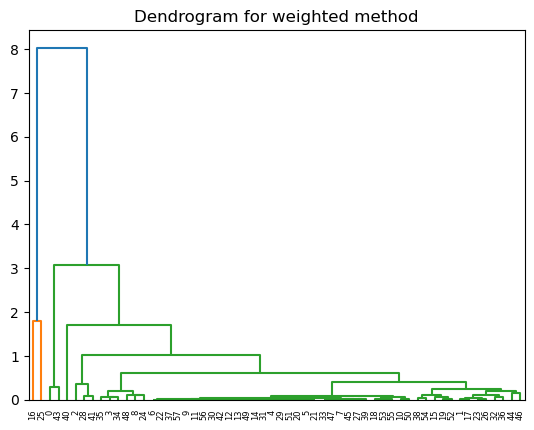

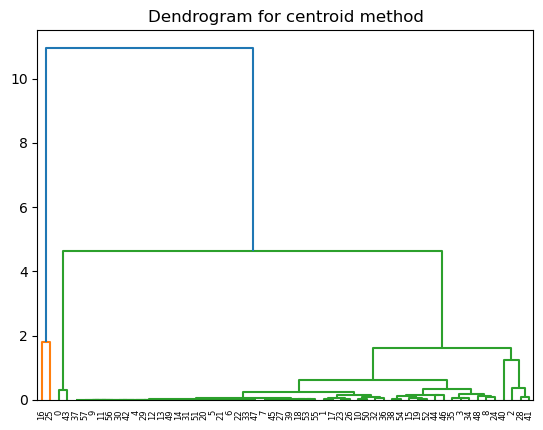

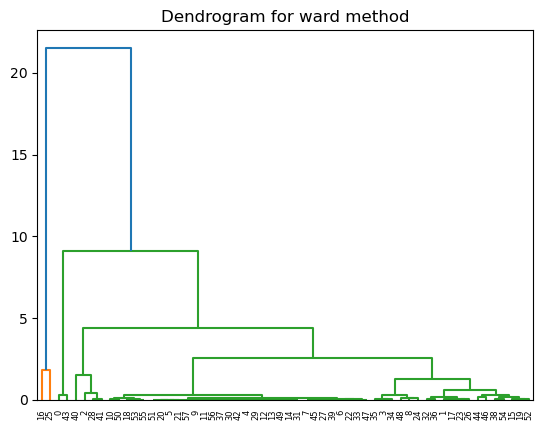

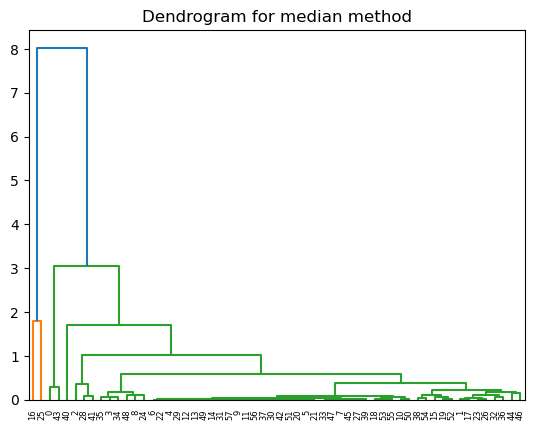



	Plotting for features: (2, 4, 8, 10, 11)


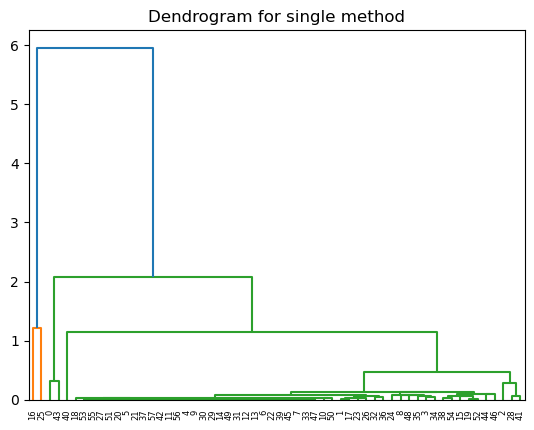

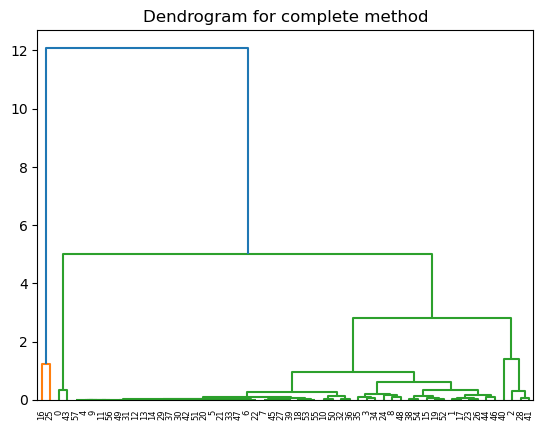

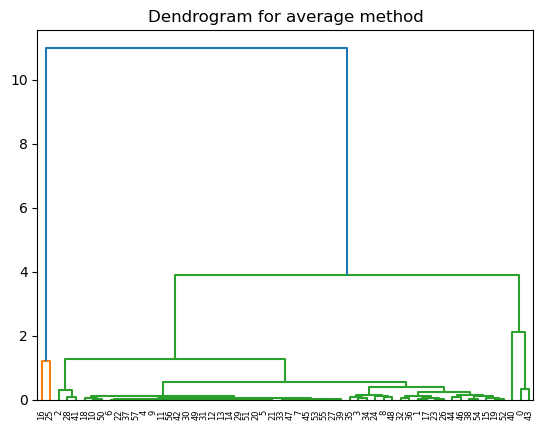

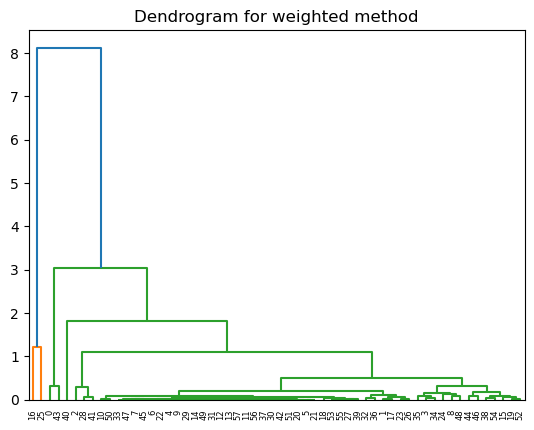

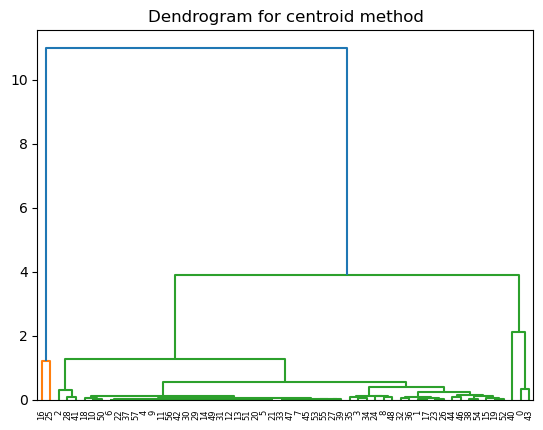

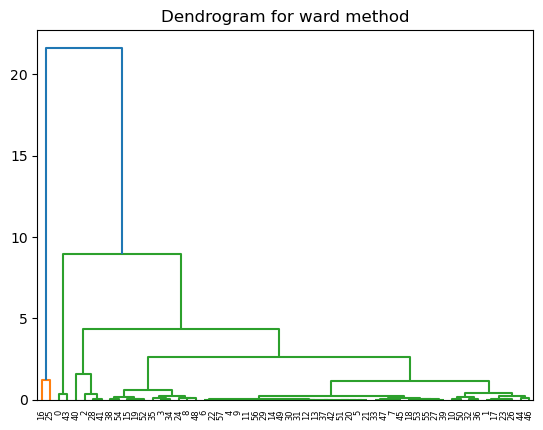

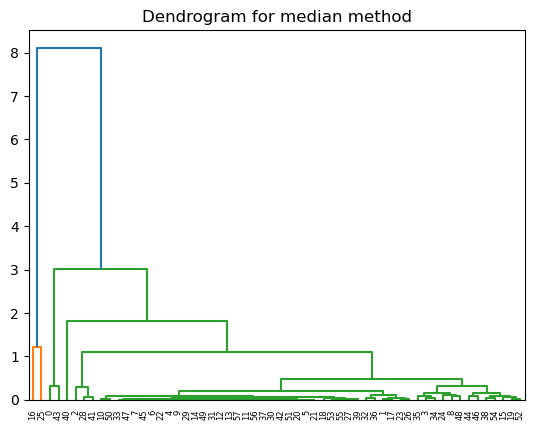



	Plotting for features: (0, 1, 2, 3, 6, 8, 9)


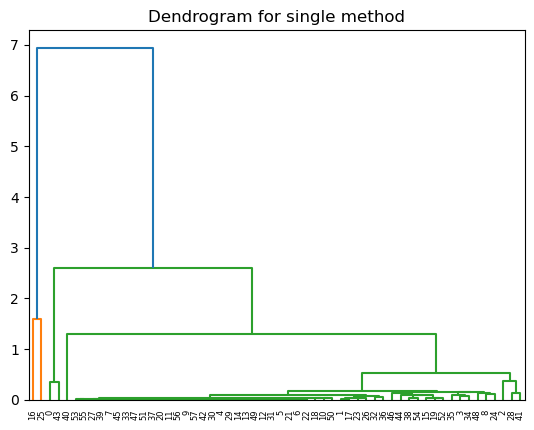

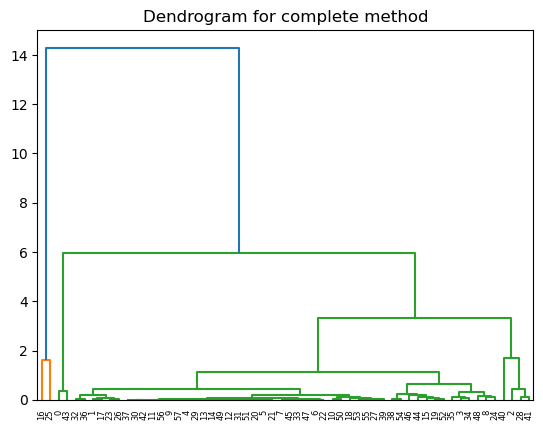

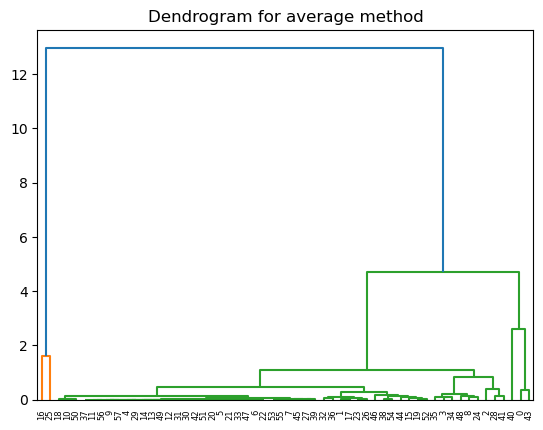

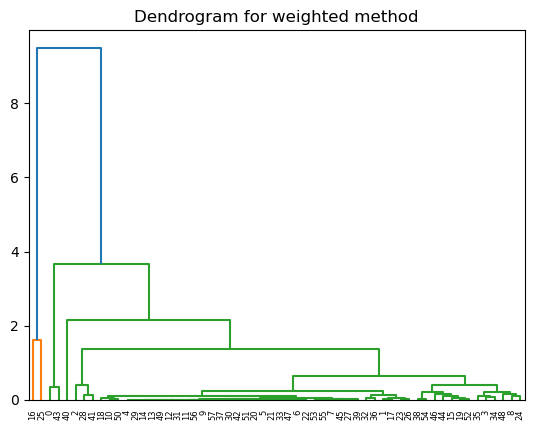

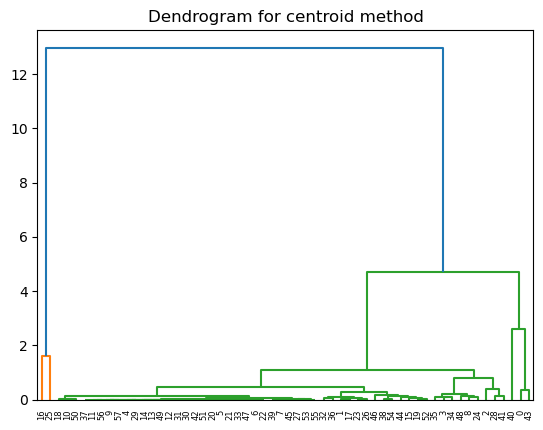

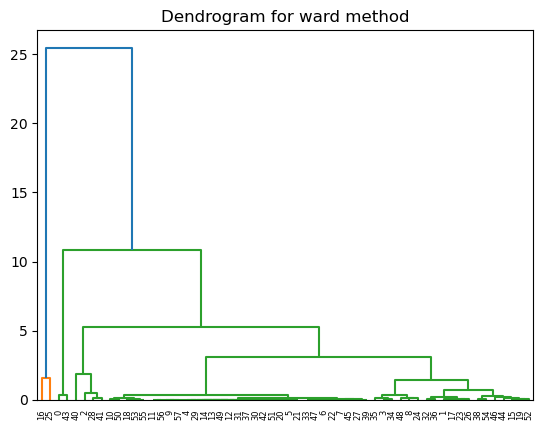

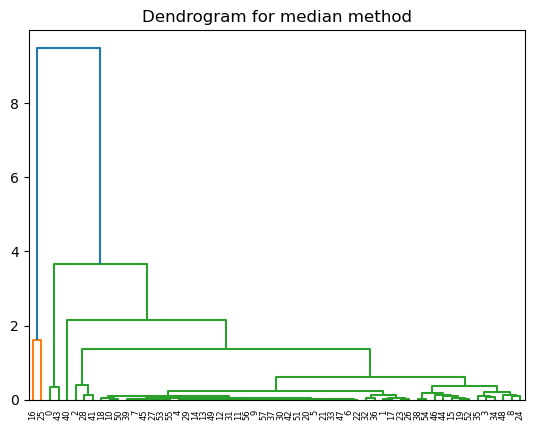



	Plotting for features: (1, 3, 5, 7, 11)


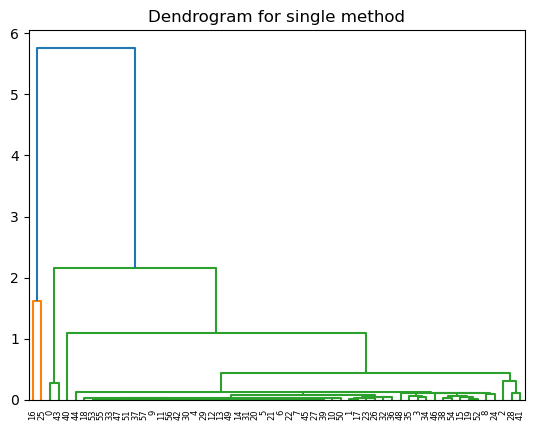

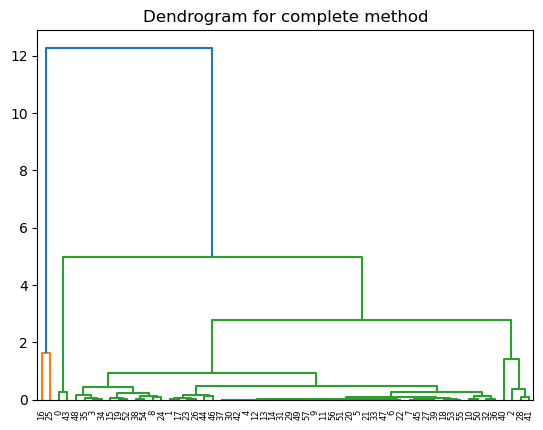

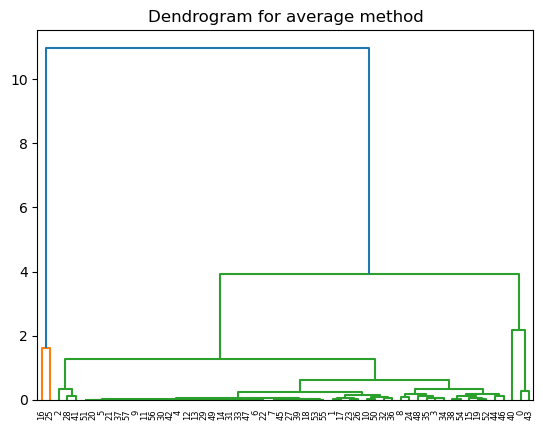

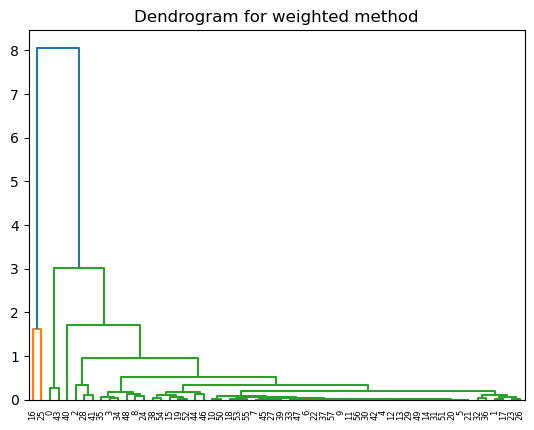

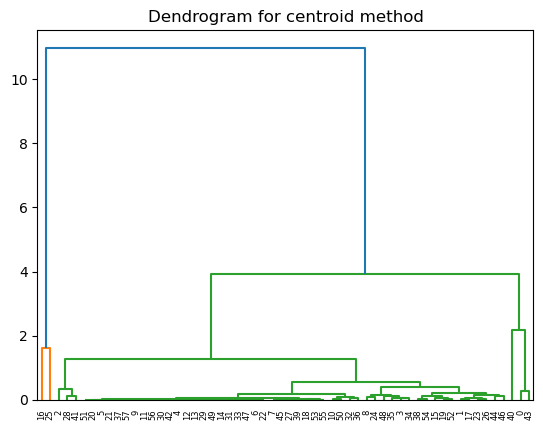

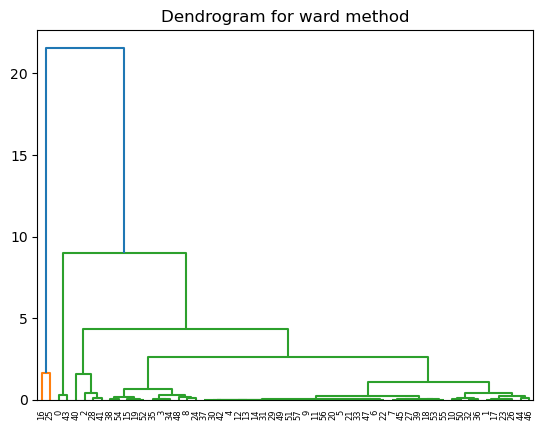

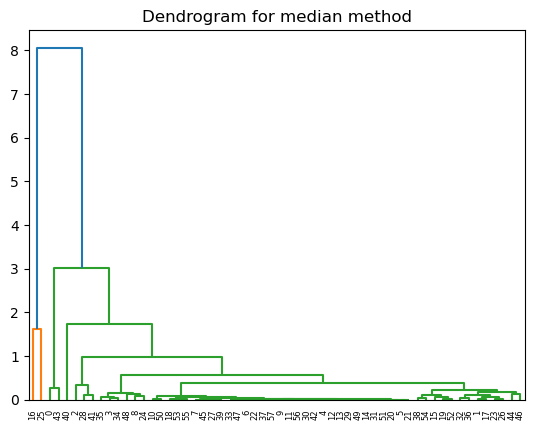

In [44]:
for feature_subset in feature_subsets:
    print("\n\n\tPlotting for features: {}".format(feature_subset))
    for linkage_method in valid_methods:
        data_subset = data[:, feature_subset]
        
        hc = HierCluster()
        linkage_matrix = hc.make_linkage(data_subset, linkage_method)
        dend = hc.draw_dendrogram(linkage_matrix)

### Observations:

1. The generated clusters are heavily influenced by the linkage and features used.
2. The single linkage method forms elongated clusters as it is very sensitive to outliers (See Single method for (0, 1))
3. The complete linkage has produced compact clusters as it uses the maximum distance. 
4. The average method seems form clusters with elongation and compactness in between the single and complete methods.
5. The centroid method has formed balanced clusters (as in number of nodes in clusters spawned from one node seem to be equal)
6. Ward's method also seems to be forming balanced clusters like centroid method. Moreover, the clusters spawned from a node seem symmetric (as in less variant wrt each other)
7. The median method seems to be very similar to the average method.
8. The dataset is slightly imbalanced as clustering doesn't seem to be symmetric regardless of the random features considered.
9. There seems to always be a node (shown in orange) with exactly two leaf nodes on the left side of the dendrogram. This could correspond to data that might be outliers or very far away from the other dominating clusters.